In [1]:
# List of packages for session
.packages = c("tidyverse", "dplyr", "caret", "reshape2", "gmodels", "expss", "gridExtra",
              "pROC", "ggthemes", "ROCR", "earth", "caretEnsemble", "caTools", "e1071",
              "randomForest")
# Install CRAN packages (if not already installed)
.inst <- .packages %in% installed.packages()
if(length(.packages[!.inst]) > 0) install.packages(.packages[!.inst])

# Load packages into session
lapply(.packages, require, character.only=TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘gtools’, ‘checkmate’, ‘htmlwidgets’, ‘plotrix’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘recipes’, ‘Rcpp’, ‘gdata’, ‘maditr’, ‘htmlTable’, ‘matrixStats’, ‘gplots’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘pbapply’, ‘bitops’, ‘proxy’


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::l

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

In [2]:
# CM table intro
cm.table <- matrix(c("True Positive (TP)", "False Positive (FP)", "False Negative (FN)",
                     "True Negative (TN)"), ncol=2, byrow = TRUE)
rownames(cm.table) <- c("Predicted: Yes", "Predicted: No")
colnames(cm.table) <- c("Actual: Yes", "Actual: No")
cm.table <- as.table(cm.table)
cm.table


               Actual: Yes         Actual: No         
Predicted: Yes True Positive (TP)  False Positive (FP)
Predicted: No  False Negative (FN) True Negative (TN) 

In [3]:
#download data
url <- "/content/sample_data/indian_liver_patient.csv"
rawdata <- read.csv(url)
rawdata[0:20,]

str(rawdata)
head(rawdata)
rawdata <- rawdata %>% rename(TB = Total_Bilirubin, DB = Direct_Bilirubin, ALP = Alkaline_Phosphotase,
                   ALT = Alamine_Aminotransferase, AST = Aspartate_Aminotransferase,
                   TP = Total_Protiens, A = Albumin, AG_Ratio = Albumin_and_Globulin_Ratio,
                   Disease = Dataset)

Age Gender Total_Bilirubin Direct_Bilirubin Alkaline_Phosphotase
1  65  Female  0.7            0.1              187                 
2  62  Male   10.9            5.5              699                 
3  62  Male    7.3            4.1              490                 
4  58  Male    1.0            0.4              182                 
5  72  Male    3.9            2.0              195                 
6  46  Male    1.8            0.7              208                 
7  26  Female  0.9            0.2              154                 
8  29  Female  0.9            0.3              202                 
9  17  Male    0.9            0.3              202                 
10 55  Male    0.7            0.2              290                 
11 57  Male    0.6            0.1              210                 
12 72  Male    2.7            1.3              260                 
13 64  Male    0.9            0.3              310                 
14 74  Female  1.1            0.4              214                 
15 61  Male    0.7            0.2              145                 
16 25  Male    0.6            0.1              183                 
17 38  Male    1.8            0.8              342                 
18 33  Male    1.6            0.5              165                 
19 40  Female  0.9            0.3              293                 
20 40  Female  0.9            0.3              293                 
   Alamine_Aminotransferase Aspartate_Aminotransferase Total_Protiens Albumin
1   16                       18                        6.8            3.3    
2   64                      100                        7.5            3.2    
3   60                       68                        7.0            3.3    
4   14                       20                        6.8            3.4    
5   27                       59                        7.3            2.4    
6   19                       14                        7.6            4.4    
7   16                       12                        7.0            3.5    
8   14                       11                        6.7            3.6    
9   22                       19                        7.4            4.1    
10  53                       58                        6.8            3.4    
11  51                       59                        5.9            2.7    
12  31                       56                        7.4            3.0    
13  61                       58                        7.0            3.4    
14  22                       30                        8.1            4.1    
15  53                       41                        5.8            2.7    
16  91                       53                        5.5            2.3    
17 168                      441                        7.6            4.4    
18  15                       23                        7.3            3.5    
19 232                      245                        6.8            3.1    
20 232                      245                        6.8            3.1    
   Albumin_and_Globulin_Ratio Dataset
1  0.90                       1      
2  0.74                       1      
3  0.89                       1      
4  1.00                       1      
5  0.40                       1      
6  1.30                       1      
7  1.00                       1      
8  1.10                       1      
9  1.20                       2      
10 1.00                       1      
11 0.80                       1      
12 0.60                       1      
13 0.90                       2      
14 1.00                       1      
15 0.87                       1      
16 0.70                       2      
17 1.30                       1      
18 0.92                       2      
19 0.80                       1      
20 0.80                       1

'data.frame':	583 obs. of  11 variables:
 $ Age                       : int  65 62 62 58 72 46 26 29 17 55 ...
 $ Gender                    : chr  "Female" "Male" "Male" "Male" ...
 $ Total_Bilirubin           : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ Direct_Bilirubin          : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkaline_Phosphotase      : int  187 699 490 182 195 208 154 202 202 290 ...
 $ Alamine_Aminotransferase  : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Aspartate_Aminotransferase: int  18 100 68 20 59 14 12 11 19 58 ...
 $ Total_Protiens            : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ Albumin                   : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ Albumin_and_Globulin_Ratio: num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Dataset                   : int  1 1 1 1 1 1 1 1 2 1 ...


Age Gender Total_Bilirubin Direct_Bilirubin Alkaline_Phosphotase
1 65  Female  0.7            0.1              187                 
2 62  Male   10.9            5.5              699                 
3 62  Male    7.3            4.1              490                 
4 58  Male    1.0            0.4              182                 
5 72  Male    3.9            2.0              195                 
6 46  Male    1.8            0.7              208                 
  Alamine_Aminotransferase Aspartate_Aminotransferase Total_Protiens Albumin
1 16                        18                        6.8            3.3    
2 64                       100                        7.5            3.2    
3 60                        68                        7.0            3.3    
4 14                        20                        6.8            3.4    
5 27                        59                        7.3            2.4    
6 19                        14                        7.6            4.4    
  Albumin_and_Globulin_Ratio Dataset
1 0.90                       1      
2 0.74                       1      
3 0.89                       1      
4 1.00                       1      
5 0.40                       1      
6 1.30                       1

In [4]:
### Part 1 - Exploratory Data Analysis (EDA)
url <- "/content/sample_data/indian_liver_patient.csv"
df <- read_csv(url)
summary(df)

df <- df %>%
  filter(!is.na(Albumin_and_Globulin_Ratio)) # The Albumin_and_Globulin_Ratio had 4 NA entry, so I remove them.

# unique(df$Gender) # Verify the unique values in Gender variable
df$Gender <- as.factor(df$Gender) # Transform chr to factor
df$Dataset <- as.factor(df$Dataset) # Transform chr to factor
levels(df$Dataset) <- c("liver_disease", "no_liver_disease") # Rename
df.o <- df # Original Dataframe

Rows: 583 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Gender
dbl (10): Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alam...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


      Age           Gender          Total_Bilirubin  Direct_Bilirubin
 Min.   : 4.00   Length:583         Min.   : 0.400   Min.   : 0.100  
 1st Qu.:33.00   Class :character   1st Qu.: 0.800   1st Qu.: 0.200  
 Median :45.00   Mode  :character   Median : 1.000   Median : 0.300  
 Mean   :44.75                      Mean   : 3.299   Mean   : 1.486  
 3rd Qu.:58.00                      3rd Qu.: 2.600   3rd Qu.: 1.300  
 Max.   :90.00                      Max.   :75.000   Max.   :19.700  
                                                                     
 Alkaline_Phosphotase Alamine_Aminotransferase Aspartate_Aminotransferase
 Min.   :  63.0       Min.   :  10.00          Min.   :  10.0            
 1st Qu.: 175.5       1st Qu.:  23.00          1st Qu.:  25.0            
 Median : 208.0       Median :  35.00          Median :  42.0            
 Mean   : 290.6       Mean   :  80.71          Mean   : 109.9            
 3rd Qu.: 298.0       3rd Qu.:  60.50          3rd Qu.:  87.0         

In [5]:
df.o <- df.o %>% # create a new variable (AST/ALT ratio)
  mutate(AST_ALT_ratio = Aspartate_Aminotransferase/Alamine_Aminotransferase)
df.o <- df.o[,c(1:10, 12, 11)] #change columns order


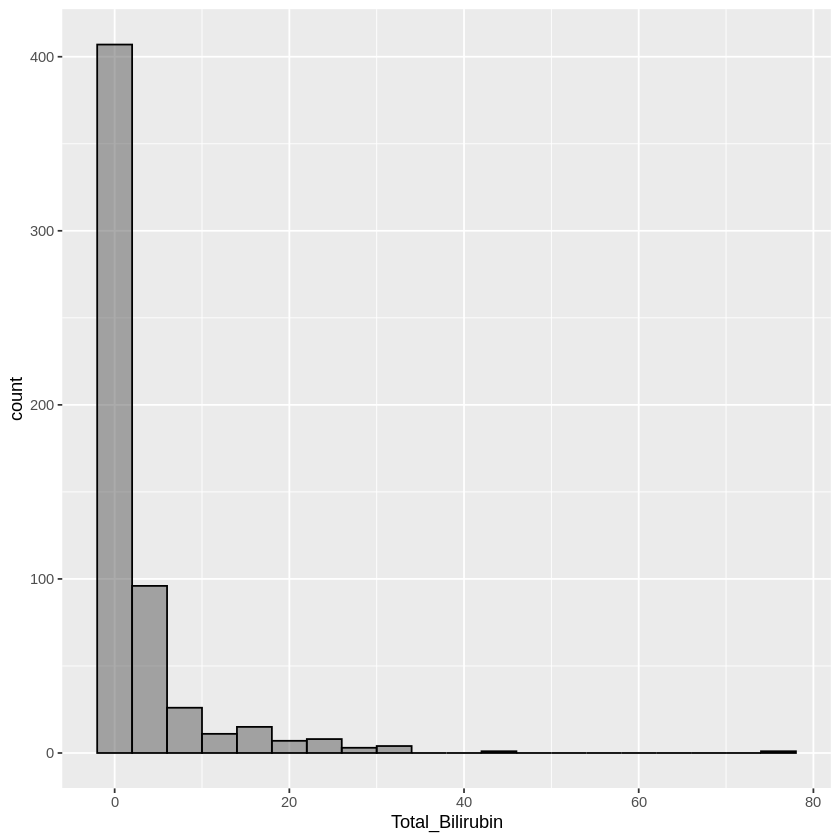

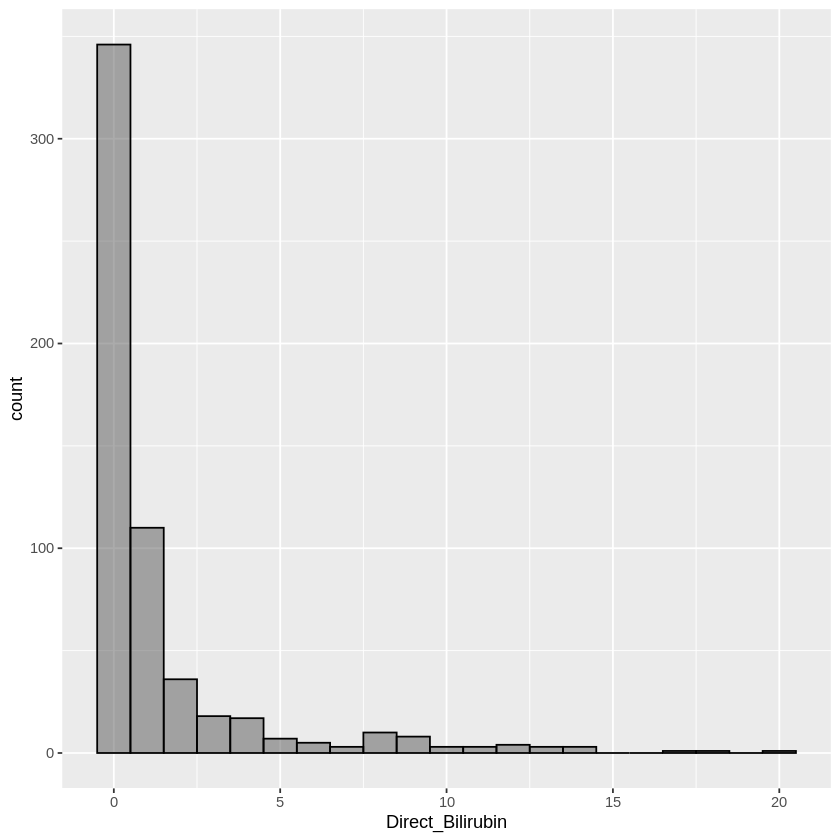

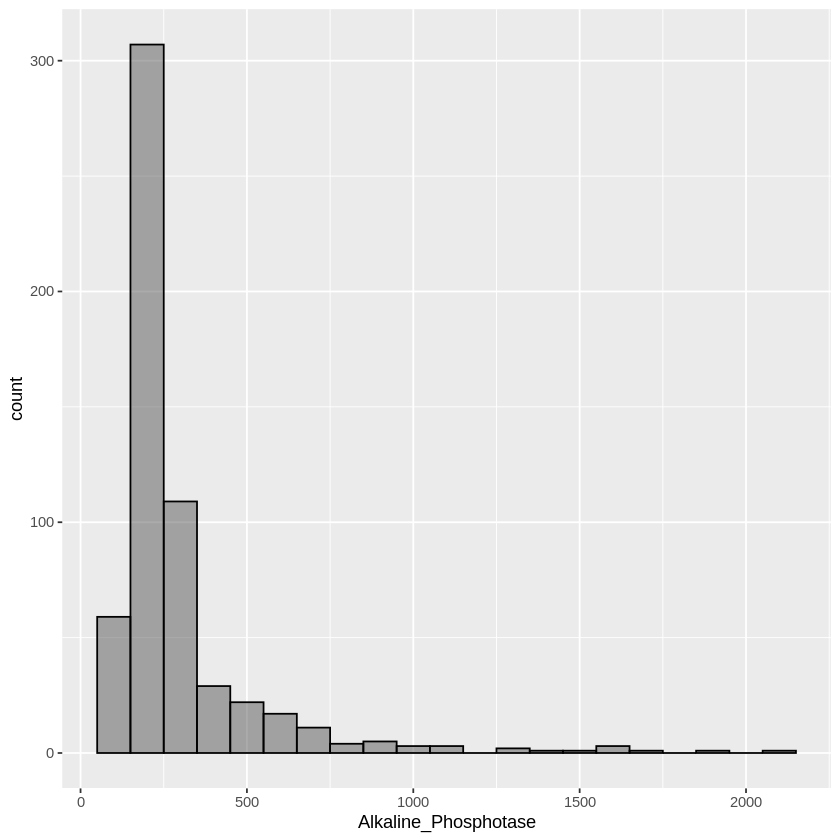

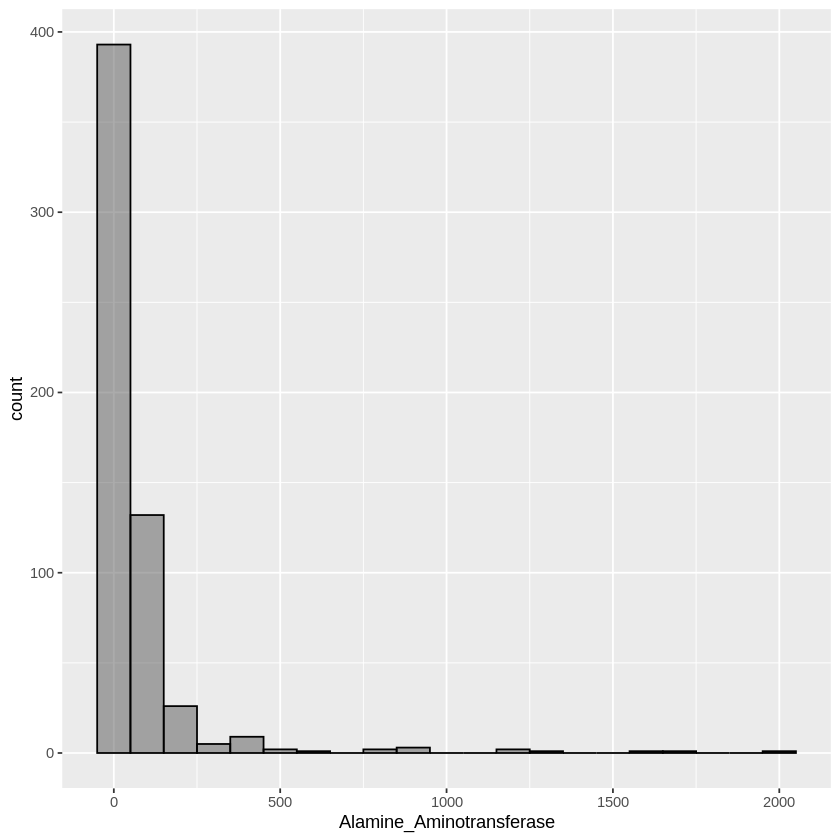

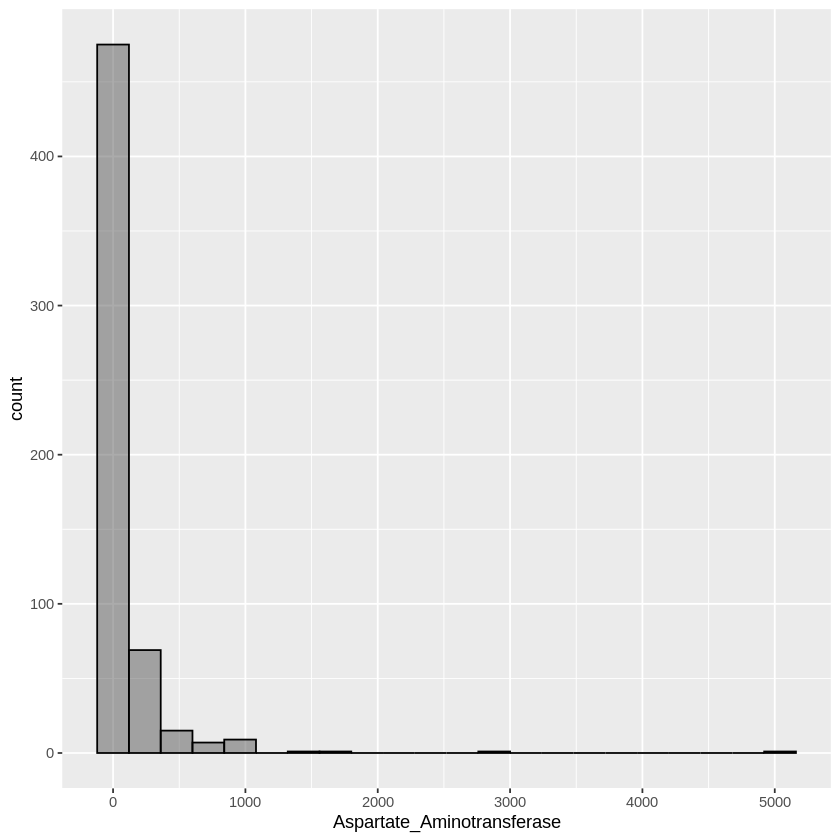

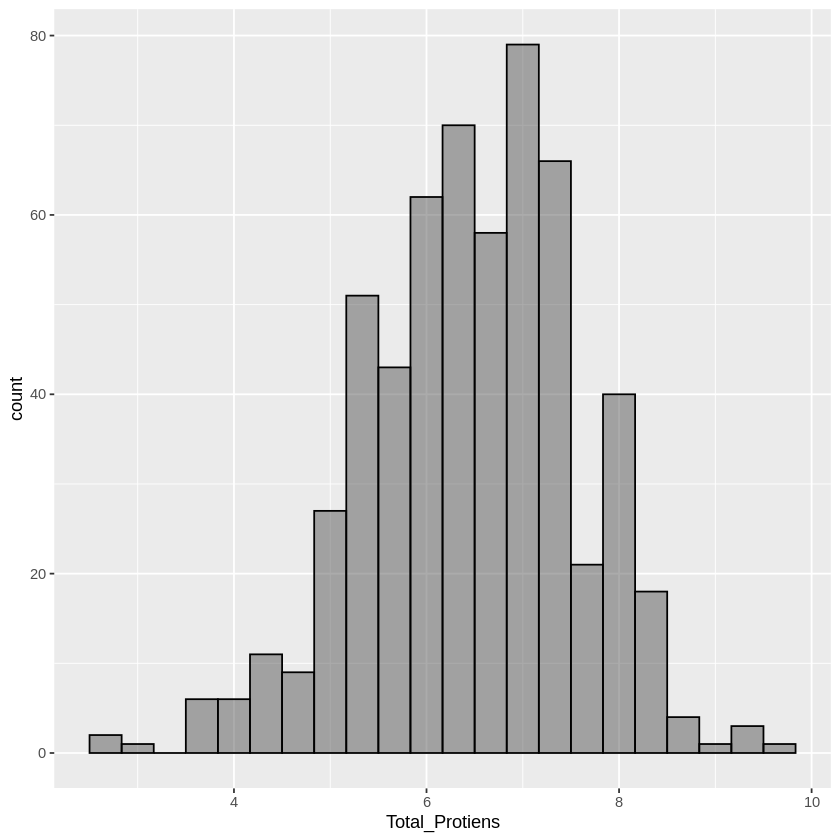

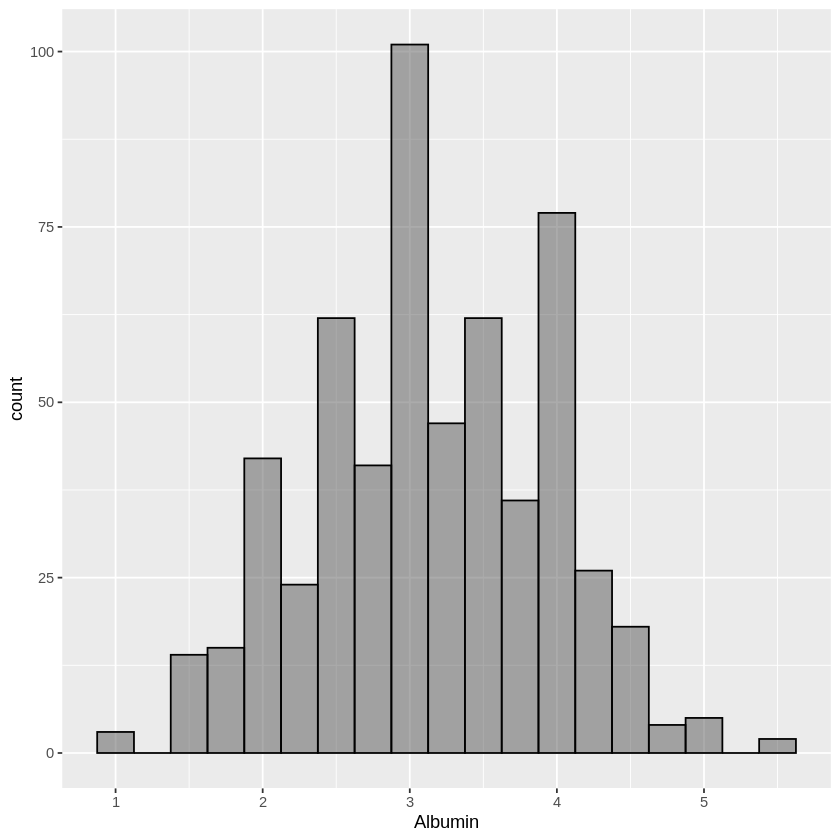

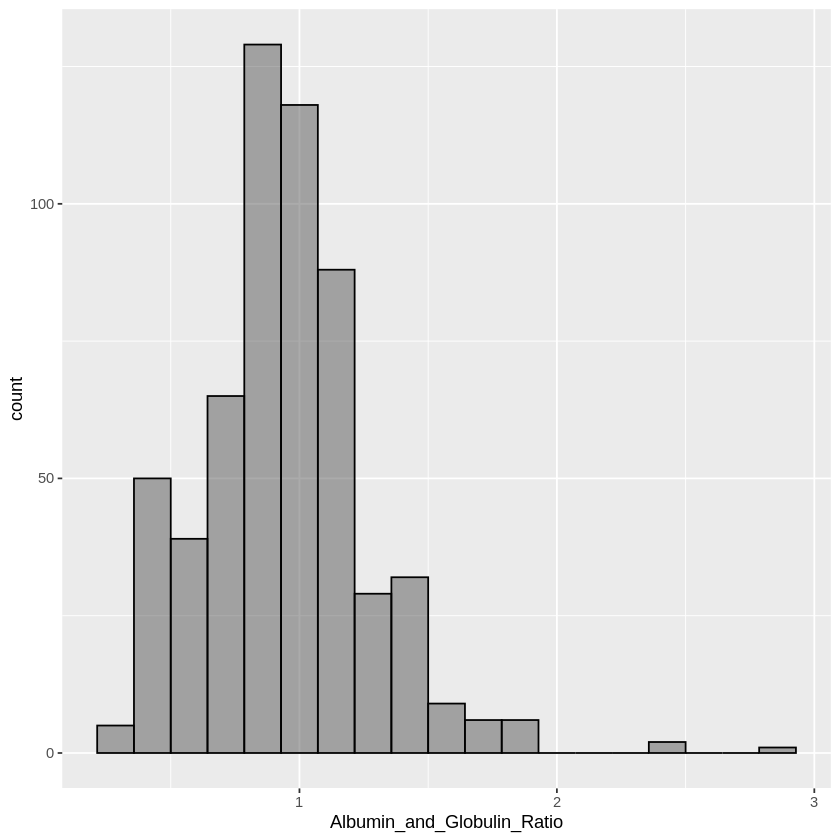

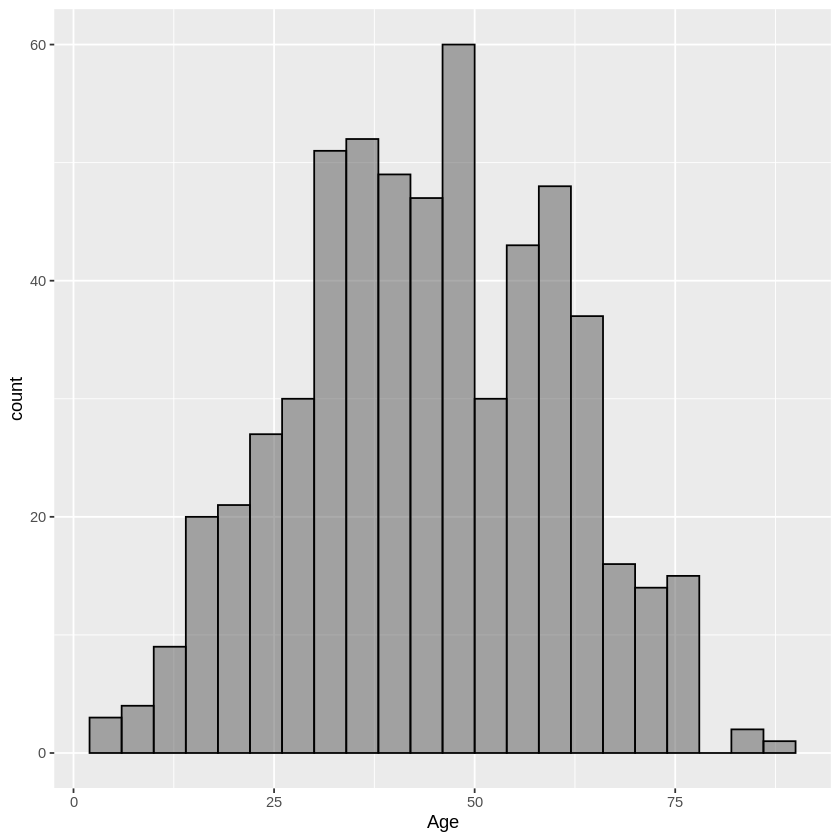

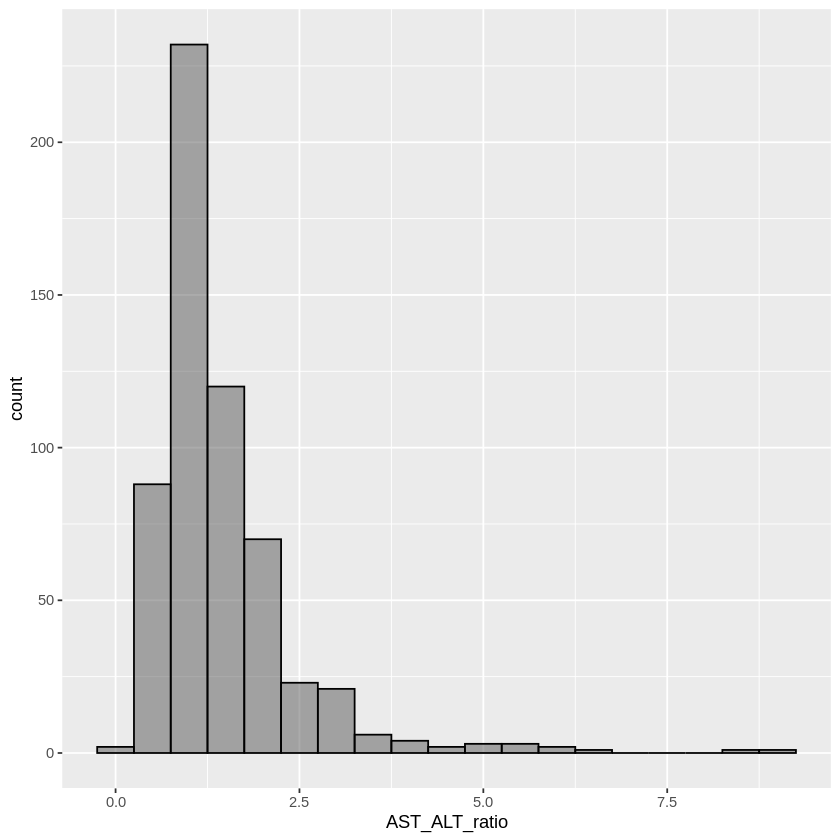

In [6]:
ph1 <- ggplot(df.o, aes(x=Total_Bilirubin)) +
    geom_histogram(binwidth=4, colour="black", alpha=.5)
ph1
ph2 <- ggplot(df.o, aes(x=Direct_Bilirubin)) +
    geom_histogram(binwidth=1, colour="black", alpha=.5)
ph2
ph3 <- ggplot(df.o, aes(x=Alkaline_Phosphotase)) +
    geom_histogram(binwidth=100, colour="black", alpha=.5)
ph3
ph4 <- ggplot(df.o, aes(x=Alamine_Aminotransferase)) +
    geom_histogram(binwidth=100, colour="black", alpha=.5)
ph4
ph5 <- ggplot(df.o, aes(x=Aspartate_Aminotransferase)) +
    geom_histogram(binwidth=240, colour="black", alpha=.5)
ph5
ph6 <- ggplot(df.o, aes(x=Total_Protiens)) +
    geom_histogram(binwidth=1/3, colour="black", alpha=.5)
ph6
ph7 <- ggplot(df.o, aes(x=Albumin)) +
    geom_histogram(binwidth=1/4, colour="black", alpha=.5)
ph7
ph8 <- ggplot(df.o, aes(x=Albumin_and_Globulin_Ratio)) +
    geom_histogram(binwidth=1/7, colour="black", alpha=.5)
ph8
ph9 <- ggplot(df.o, aes(x=Age)) +
    geom_histogram(binwidth=4, colour="black", alpha=.5)
ph9
ph10 <- ggplot(df.o, aes(x=AST_ALT_ratio)) +
    geom_histogram(binwidth=1/2, colour="black", alpha=.5)
ph10


Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


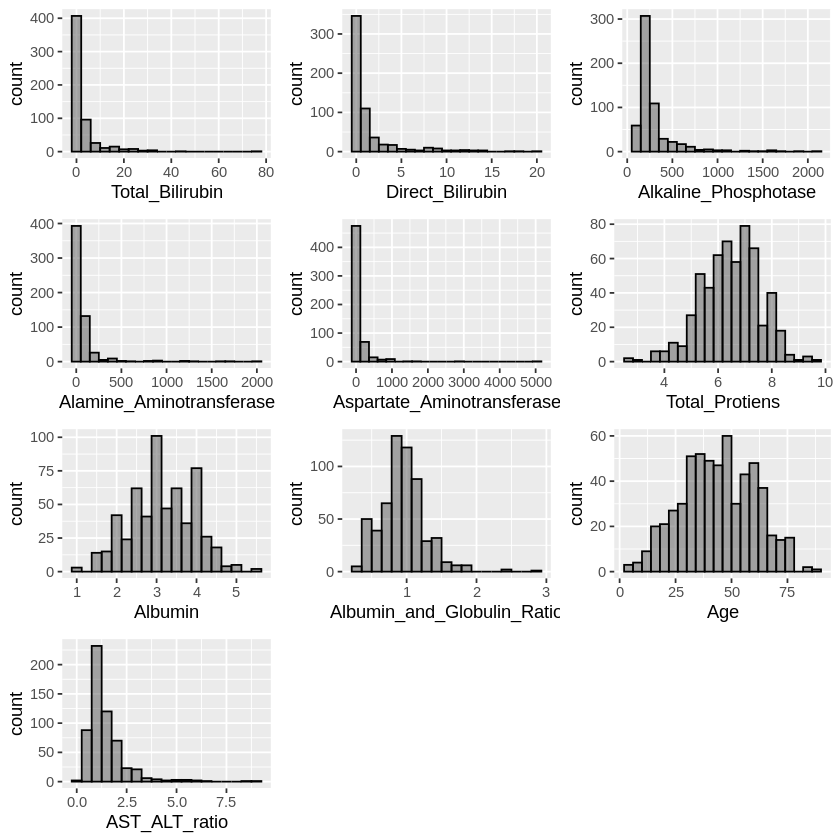

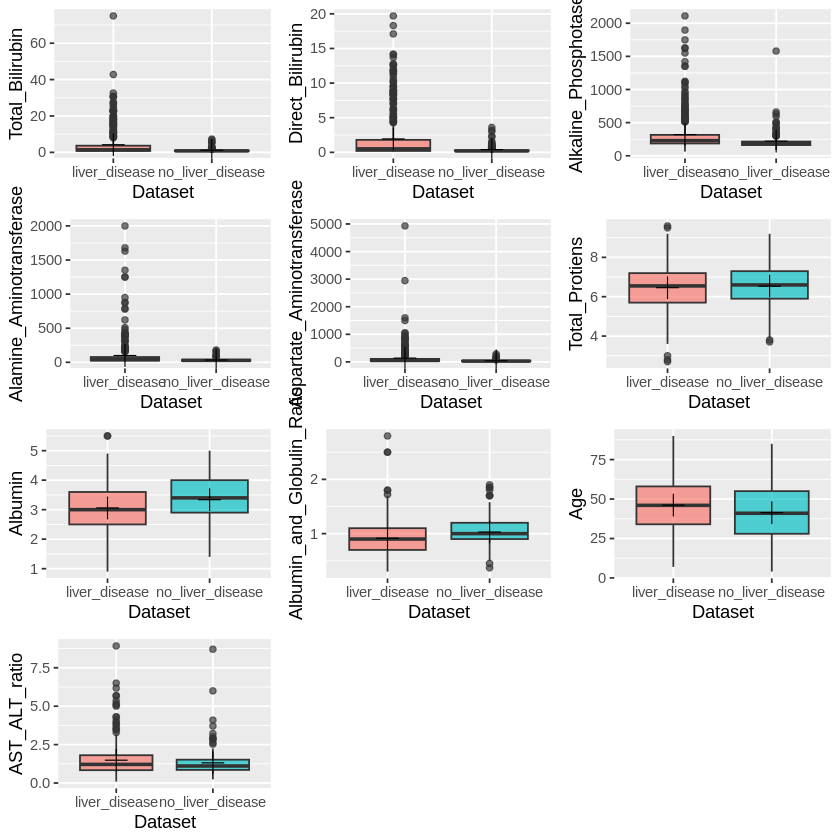

In [7]:
#The distribution of the original data:

ph1 <- ggplot(df.o, aes(x=Total_Bilirubin)) +
    geom_histogram(binwidth=4, colour="black", alpha=.5)

ph2 <- ggplot(df.o, aes(x=Direct_Bilirubin)) +
    geom_histogram(binwidth=1, colour="black", alpha=.5)

ph3 <- ggplot(df.o, aes(x=Alkaline_Phosphotase)) +
    geom_histogram(binwidth=100, colour="black", alpha=.5)

ph4 <- ggplot(df.o, aes(x=Alamine_Aminotransferase)) +
    geom_histogram(binwidth=100, colour="black", alpha=.5)

ph5 <- ggplot(df.o, aes(x=Aspartate_Aminotransferase)) +
    geom_histogram(binwidth=240, colour="black", alpha=.5)

ph6 <- ggplot(df.o, aes(x=Total_Protiens)) +
    geom_histogram(binwidth=1/3, colour="black", alpha=.5)

ph7 <- ggplot(df.o, aes(x=Albumin)) +
    geom_histogram(binwidth=1/4, colour="black", alpha=.5)

ph8 <- ggplot(df.o, aes(x=Albumin_and_Globulin_Ratio)) +
    geom_histogram(binwidth=1/7, colour="black", alpha=.5)

ph9 <- ggplot(df.o, aes(x=Age)) +
    geom_histogram(binwidth=4, colour="black", alpha=.5)

ph10 <- ggplot(df.o, aes(x=AST_ALT_ratio)) +
    geom_histogram(binwidth=1/2, colour="black", alpha=.5)

grid.arrange(ph1, ph2, ph3, ph4, ph5, ph6, ph7, ph8, ph9, ph10, ncol=3)

#The box plots of the original data:

pb1 <- ggplot(df.o, aes(Dataset, Total_Bilirubin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb2 <- ggplot(df.o, aes(Dataset, Direct_Bilirubin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb3 <- ggplot(df.o, aes(Dataset, Alkaline_Phosphotase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb4 <- ggplot(df.o, aes(Dataset, Alamine_Aminotransferase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb5 <- ggplot(df.o, aes(Dataset, Aspartate_Aminotransferase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb6 <- ggplot(df.o, aes(Dataset, Total_Protiens)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb7 <- ggplot(df.o, aes(Dataset, Albumin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb8 <- ggplot(df.o, aes(Dataset, Albumin_and_Globulin_Ratio)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb9 <- ggplot(df.o, aes(Dataset, Age)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb10 <- ggplot(df.o, aes(Dataset, AST_ALT_ratio)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

grid.arrange(pb1, pb2, pb3, pb4, pb5, pb6, pb7, pb8, pb9, pb10, ncol=3)


In [8]:
df.o.log <- df.o
df.o.log[,c("Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Albumin_and_Globulin_Ratio", "AST_ALT_ratio")] <- lapply(df.o.log[,c("Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Albumin_and_Globulin_Ratio", "AST_ALT_ratio")], function(x) (log(x+1)))

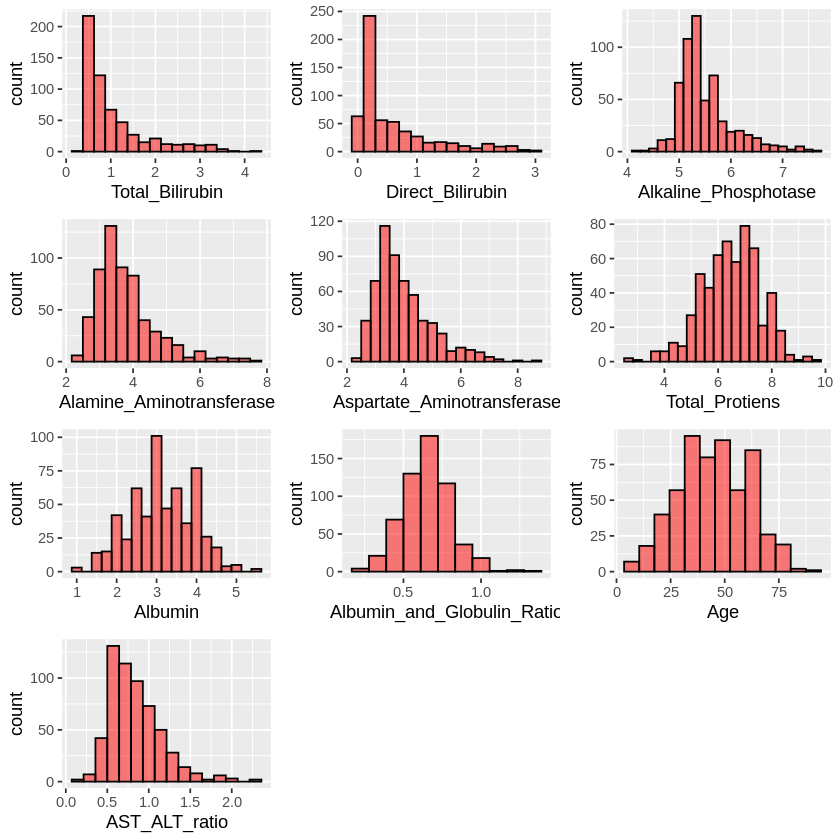

In [9]:
phh1 <- ggplot(df.o.log, aes(x=Total_Bilirubin)) +
    geom_histogram(binwidth=1/4, fill="red", colour="black", alpha=.5)

phh2 <- ggplot(df.o.log, aes(x=Direct_Bilirubin)) +
    geom_histogram(binwidth=1/5, fill="red", colour="black", alpha=.5)

phh3 <- ggplot(df.o.log, aes(x=Alkaline_Phosphotase)) +
    geom_histogram(binwidth=1/6, fill="red", colour="black", alpha=.5)

phh4 <- ggplot(df.o.log, aes(x=Alamine_Aminotransferase)) +
    geom_histogram(binwidth=1/3, fill="red", colour="black", alpha=.5)

phh5 <- ggplot(df.o.log, aes(x=Aspartate_Aminotransferase)) +
    geom_histogram(binwidth=1/3, fill="red", colour="black", alpha=.5)

phh6 <- ggplot(df.o.log, aes(x=Total_Protiens)) +
    geom_histogram(binwidth=1/3, fill="red", colour="black", alpha=.5)

phh7 <- ggplot(df.o.log, aes(x=Albumin)) +
    geom_histogram(binwidth=1/4, fill="red", colour="black", alpha=.5)

phh8 <- ggplot(df.o.log, aes(x=Albumin_and_Globulin_Ratio)) +
    geom_histogram(binwidth=1/9, fill="red", colour="black", alpha=.5)

phh9 <- ggplot(df.o.log, aes(x=Age)) +
    geom_histogram(binwidth=7, fill="red", colour="black", alpha=.5)

phh10 <- ggplot(df.o.log, aes(x=AST_ALT_ratio)) +
    geom_histogram(binwidth=1/7, fill="red", colour="black", alpha=.5)

grid.arrange(phh1, phh2, phh3, phh4, phh5, phh6, phh7, phh8, phh9, phh10, ncol=3)

In [10]:
out1 <- sort.int(boxplot.stats(df.o$Total_Bilirubin)$out)
out2 <- sort.int(boxplot.stats(df.o$Direct_Bilirubin)$out)
out3 <- sort.int(boxplot.stats(df.o$Alkaline_Phosphotase)$out)
out4 <- sort.int(boxplot.stats(df.o$Alamine_Aminotransferase)$out)
out5 <- sort.int(boxplot.stats(df.o$Aspartate_Aminotransferase)$out)
out6 <- sort.int(boxplot.stats(df.o$Total_Protiens)$out)
out7 <- sort.int(boxplot.stats(df.o$Albumin)$out)
out8 <- sort.int(boxplot.stats(df.o$Albumin_and_Globulin_Ratio)$out)
out9 <- sort.int(boxplot.stats(df.o$Age)$out)
out10 <- sort.int(boxplot.stats(df.o$AST_ALT_ratio)$out)

df.o.wo <- df.o %>%
    mutate(Total_Bilirubin = replace(Total_Bilirubin, Total_Bilirubin >= 5.5, 5.3),
          Direct_Bilirubin = replace(Direct_Bilirubin, Direct_Bilirubin >= 3, 2.8),
          Alkaline_Phosphotase = replace(Alkaline_Phosphotase, Alkaline_Phosphotase >= 482, 480),
          Alamine_Aminotransferase = replace(Alamine_Aminotransferase, Alamine_Aminotransferase >= 119, 118),
          Aspartate_Aminotransferase = replace(Aspartate_Aminotransferase, Aspartate_Aminotransferase >= 181, 180),
          Total_Protiens = replace(Total_Protiens, Total_Protiens >= 9.5, 9.2),
          Total_Protiens = replace(Total_Protiens, Total_Protiens <= 3.6, 3.7),
          Albumin_and_Globulin_Ratio = replace(Albumin_and_Globulin_Ratio, Albumin_and_Globulin_Ratio >= 1.72, 1.7),
          AST_ALT_ratio = replace(AST_ALT_ratio, AST_ALT_ratio >= 3.1, 3))

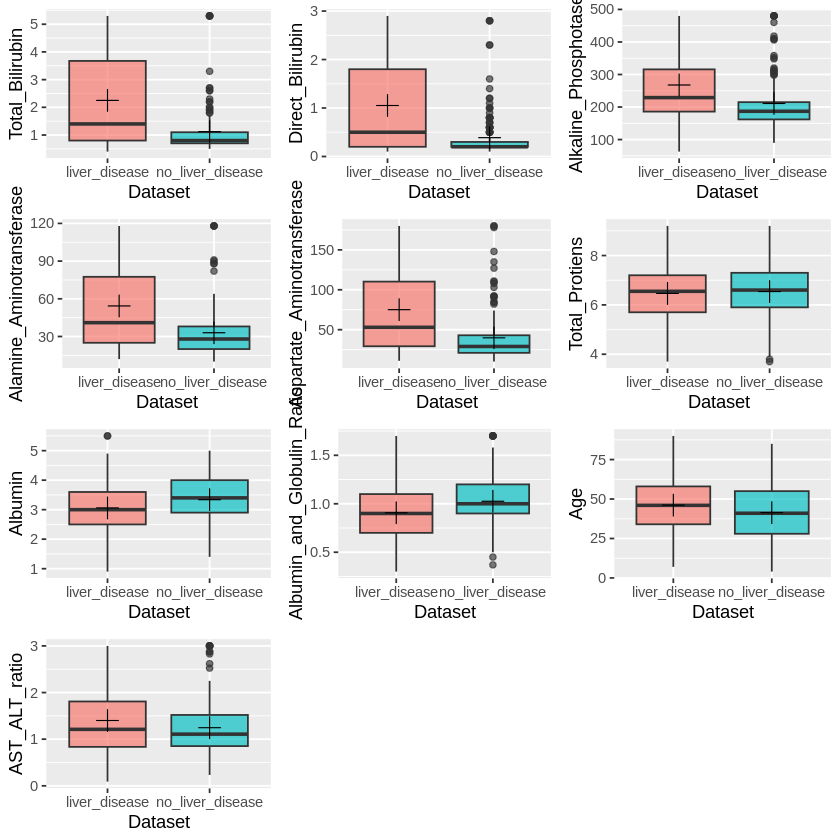

In [11]:
pb1 <- ggplot(df.o.wo, aes(Dataset, Total_Bilirubin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb2 <- ggplot(df.o.wo, aes(Dataset, Direct_Bilirubin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb3 <- ggplot(df.o.wo, aes(Dataset, Alkaline_Phosphotase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb4 <- ggplot(df.o.wo, aes(Dataset, Alamine_Aminotransferase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb5 <- ggplot(df.o.wo, aes(Dataset, Aspartate_Aminotransferase)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb6 <- ggplot(df.o.wo, aes(Dataset, Total_Protiens)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb7 <- ggplot(df.o.wo, aes(Dataset, Albumin)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb8 <- ggplot(df.o.wo, aes(Dataset, Albumin_and_Globulin_Ratio)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb9 <- ggplot(df.o.wo, aes(Dataset, Age)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

pb10 <- ggplot(df.o.wo, aes(Dataset, AST_ALT_ratio)) + geom_boxplot(aes(fill = Dataset), alpha = 2/3) + stat_summary(fun.y=mean, geom="point", shape=3, size=4) + theme(legend.position = "none")

grid.arrange(pb1, pb2, pb3, pb4, pb5, pb6, pb7, pb8, pb9, pb10, ncol=3)

In [12]:
df.cat <- df.o.wo

d3 <- dist(df.cat[, 3])
d4 <- dist(df.cat[, 4])
d5 <- dist(df.cat[, 5])
d6 <- dist(df.cat[, 6])
d7 <- dist(df.cat[, 7])
d8 <- dist(df.cat[, 8])
d9 <- dist(df.cat[, 9])
d10 <- dist(df.cat[, 10])
d11 <- dist(df.cat[, 11])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [428 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [151 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [428 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [90 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [61 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [428 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


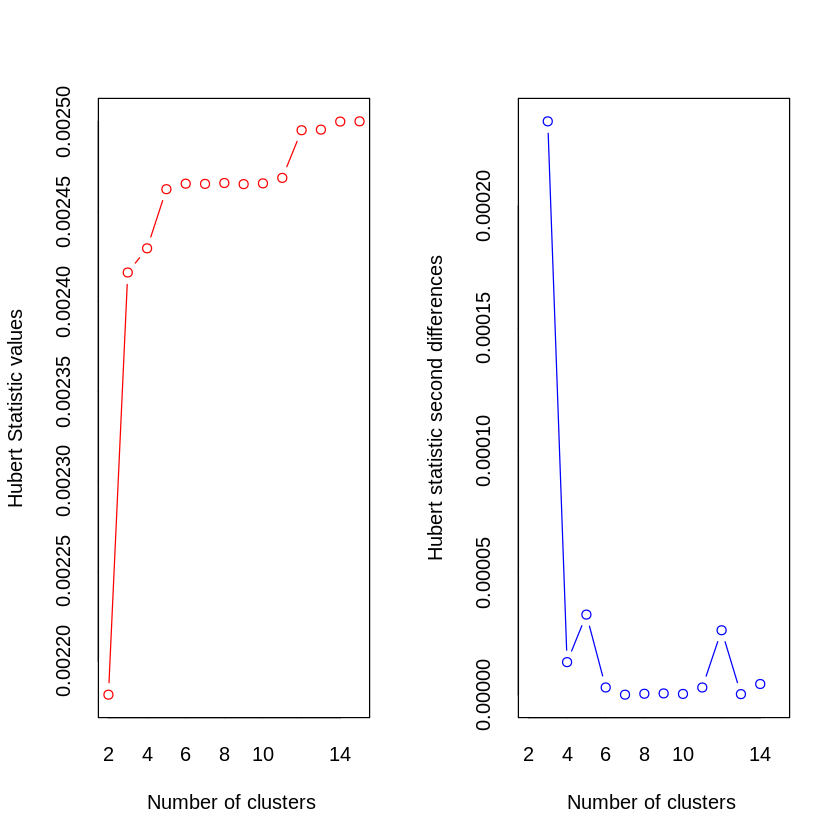

******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [472 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [107 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [414 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [107 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [58 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [472 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [107 != 1 x 1]”
Warning message in ma

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


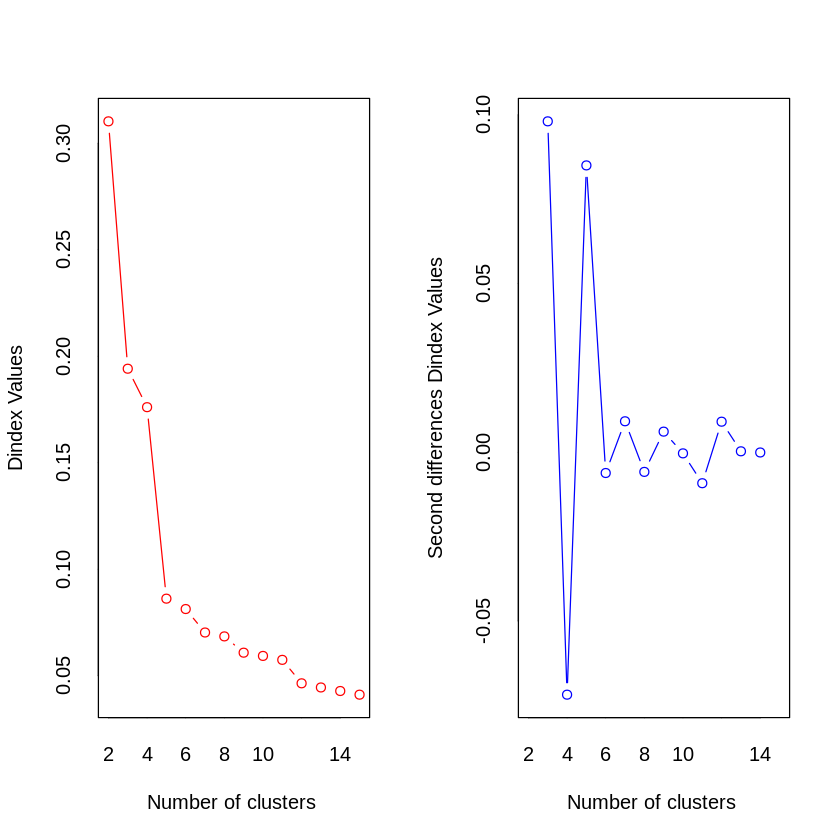

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


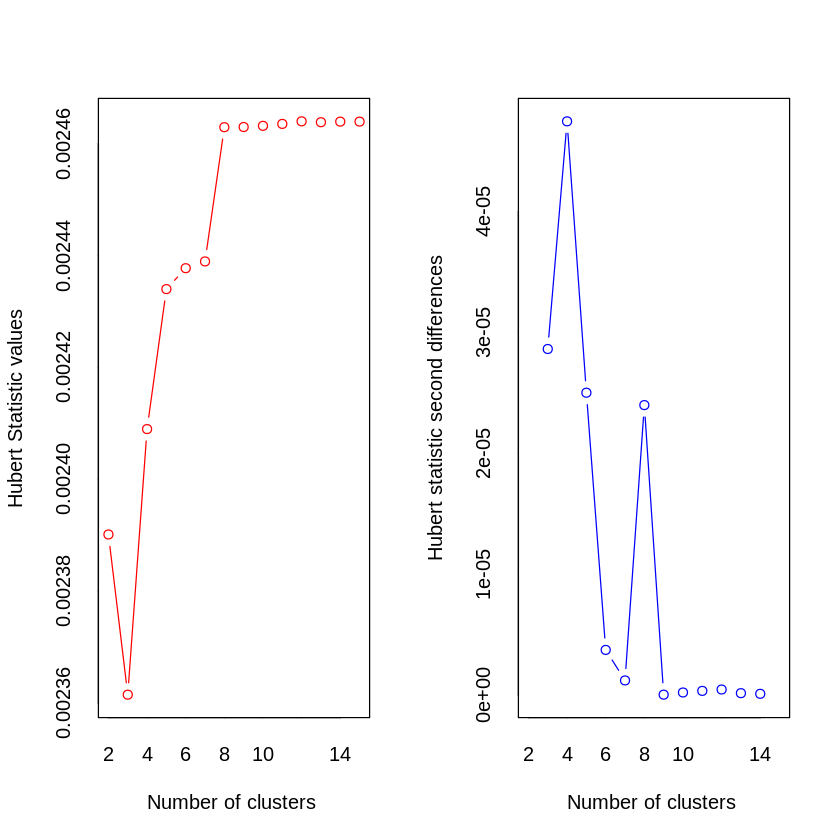

******************************************************************* 
* Among all indices:                                                
* 3 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [502 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [77 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [329 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [77 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [173 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [502 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [77 != 1 x 1]”
Warning message in matr

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


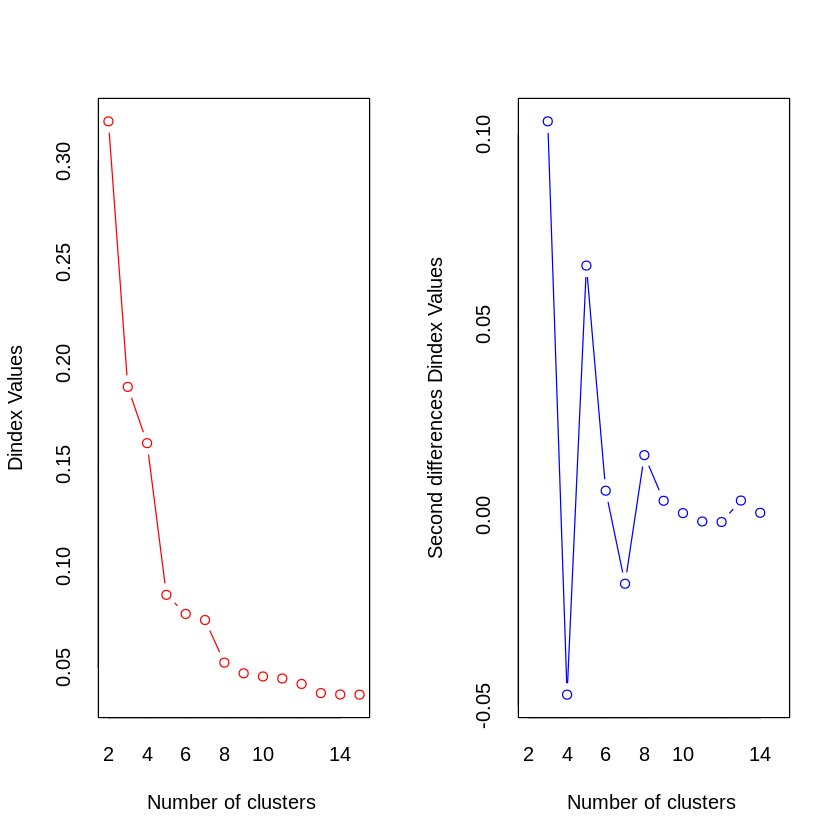

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


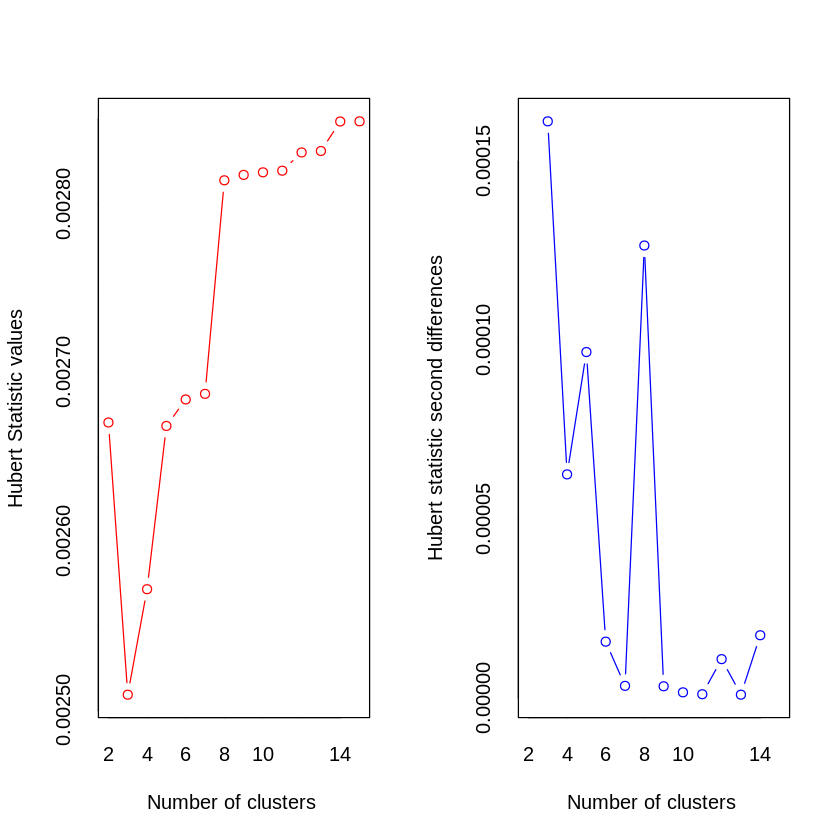

******************************************************************* 
* Among all indices:                                                
* 2 proposed 3 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  8 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [466 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [113 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [466 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [33 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [80 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [466 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [113 != 1 x 1]”
Warning message in mat

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


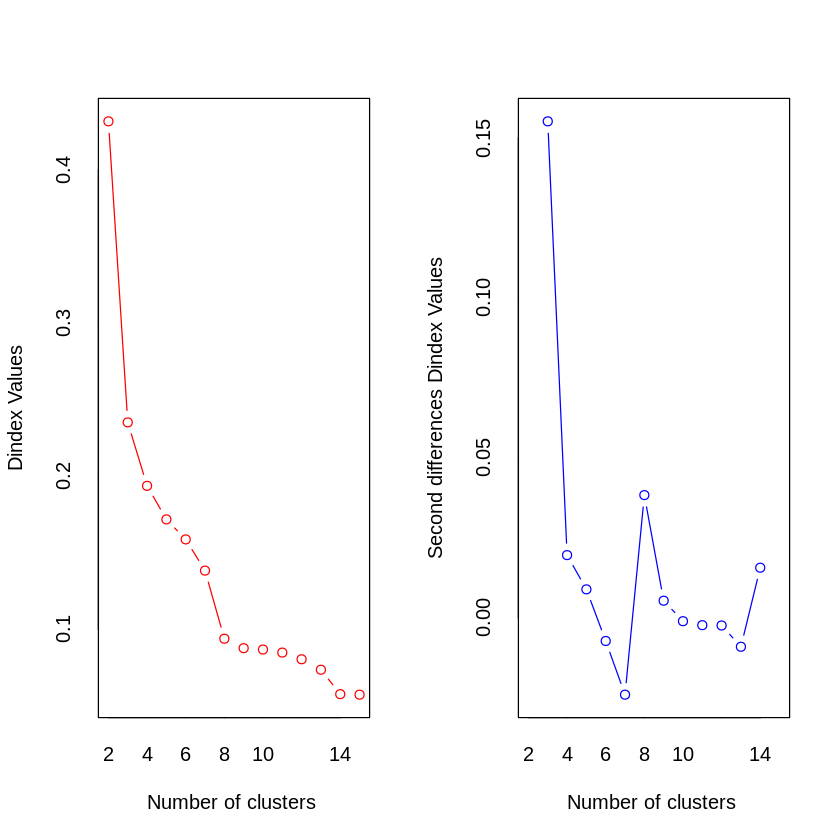

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


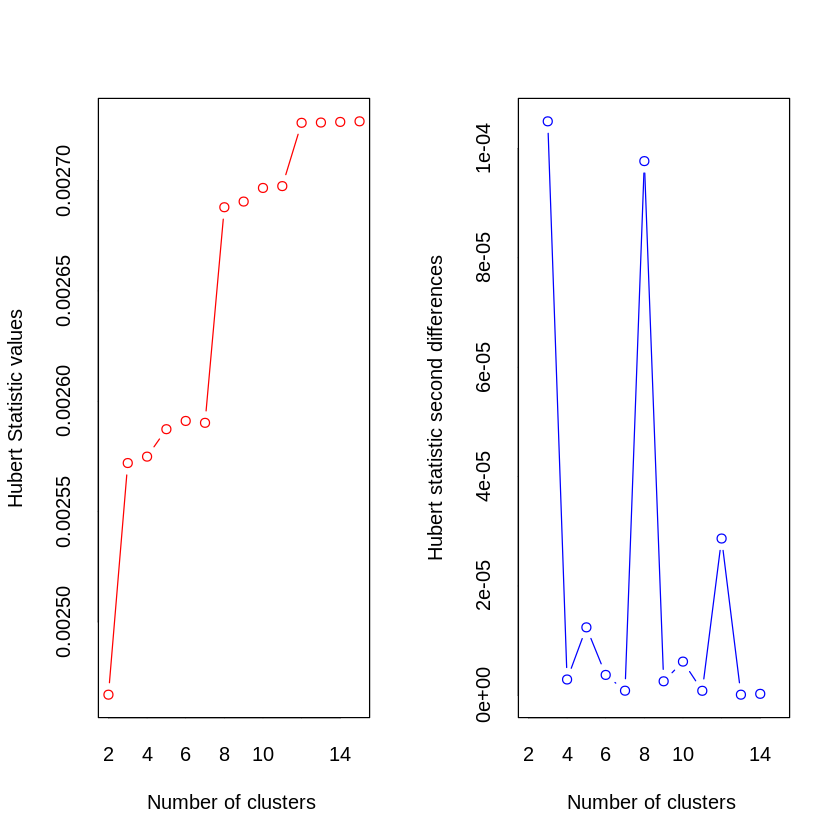

******************************************************************* 
* Among all indices:                                                
* 2 proposed 4 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  8 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [475 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [104 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [414 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [61 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [104 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [475 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [104 != 1 x 1]”
Warning message in ma

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


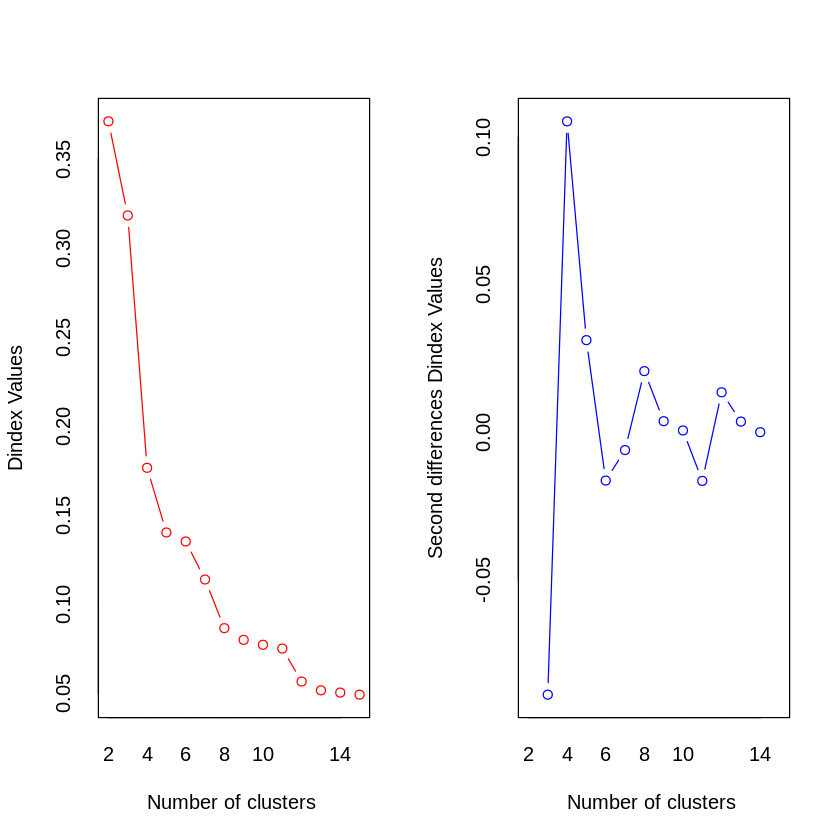

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


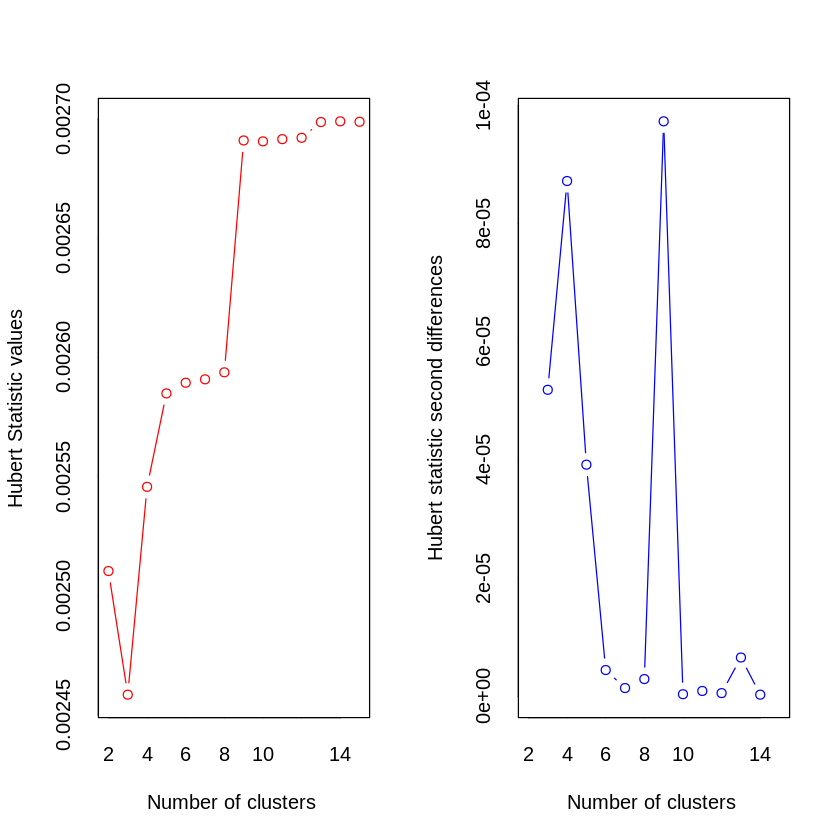

******************************************************************* 
* Among all indices:                                                
* 4 proposed 5 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [574 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [5 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [539 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [35 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [5 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [574 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [5 != 1 x 1]”
Warning message in matrix(x

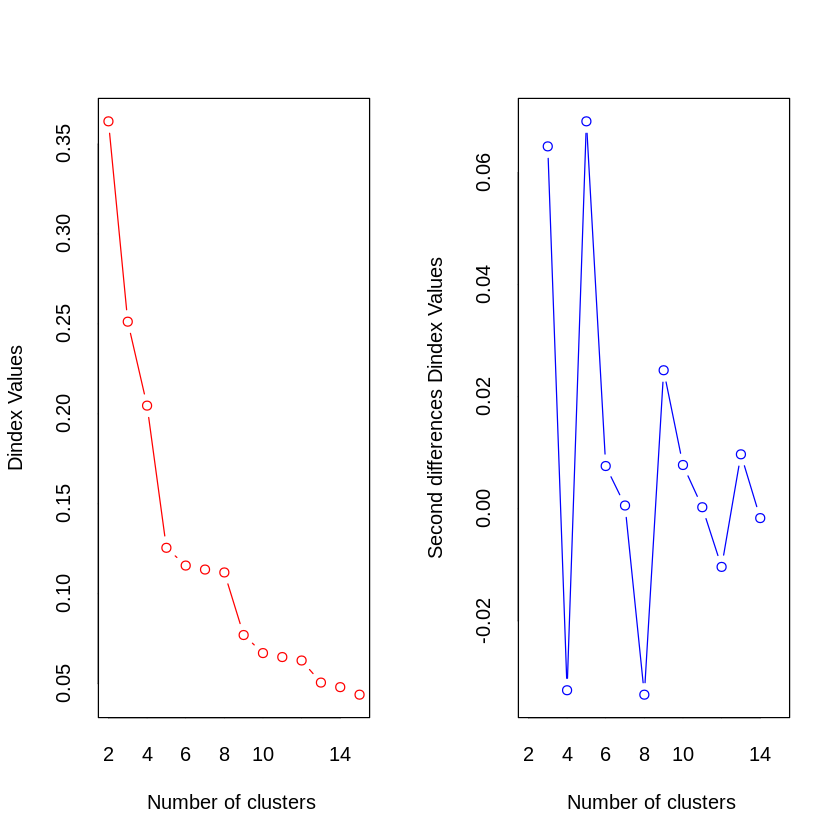

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


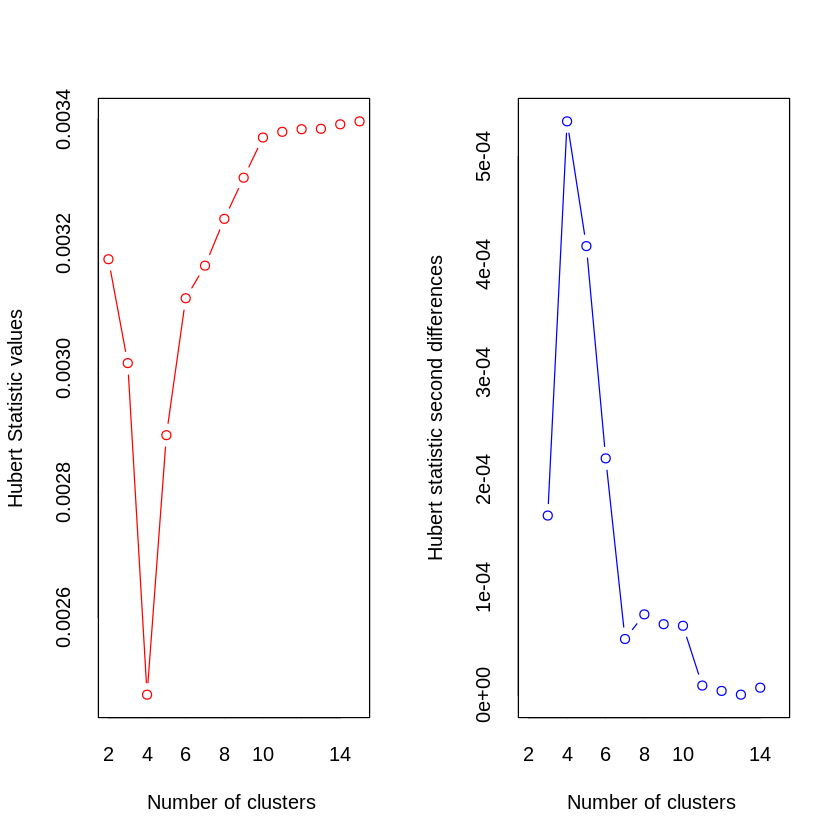

******************************************************************* 
* Among all indices:                                                
* 2 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [576 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [3 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [346 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [230 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [3 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [576 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [3 != 1 x 1]”
Warning message in matrix(

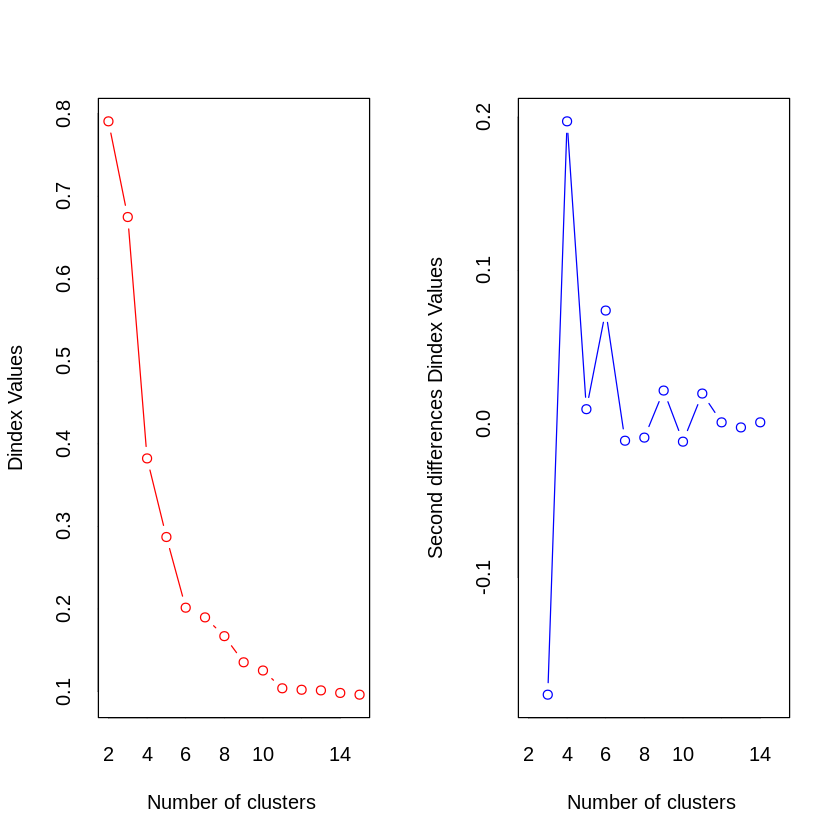

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


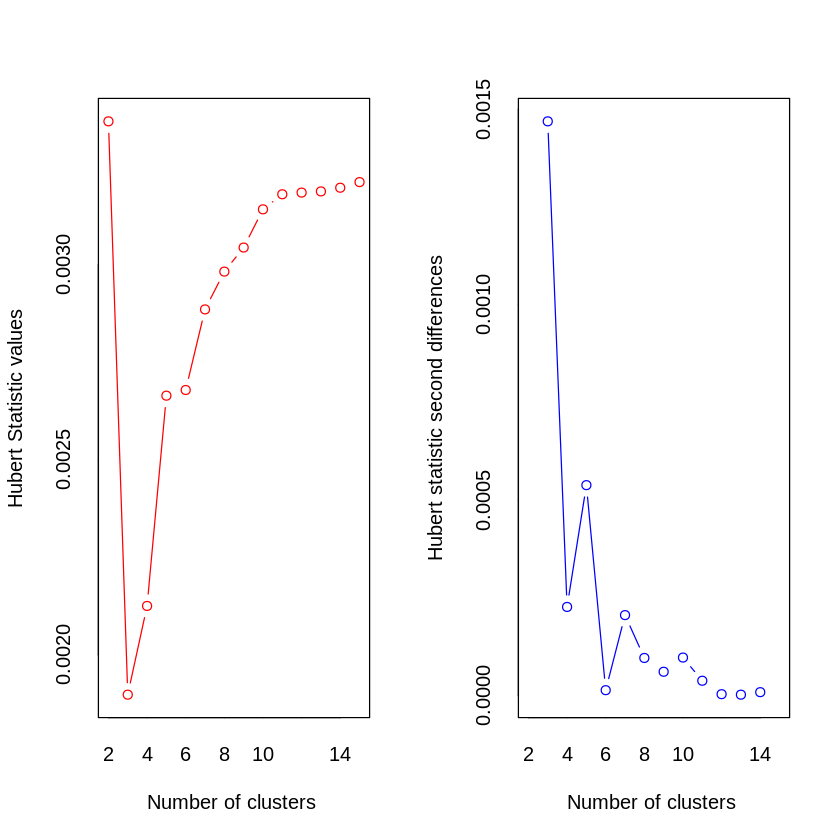

******************************************************************* 
* Among all indices:                                                
* 1 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  15 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [494 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [85 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [270 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [224 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [85 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [494 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [85 != 1 x 1]”
Warning message in matr

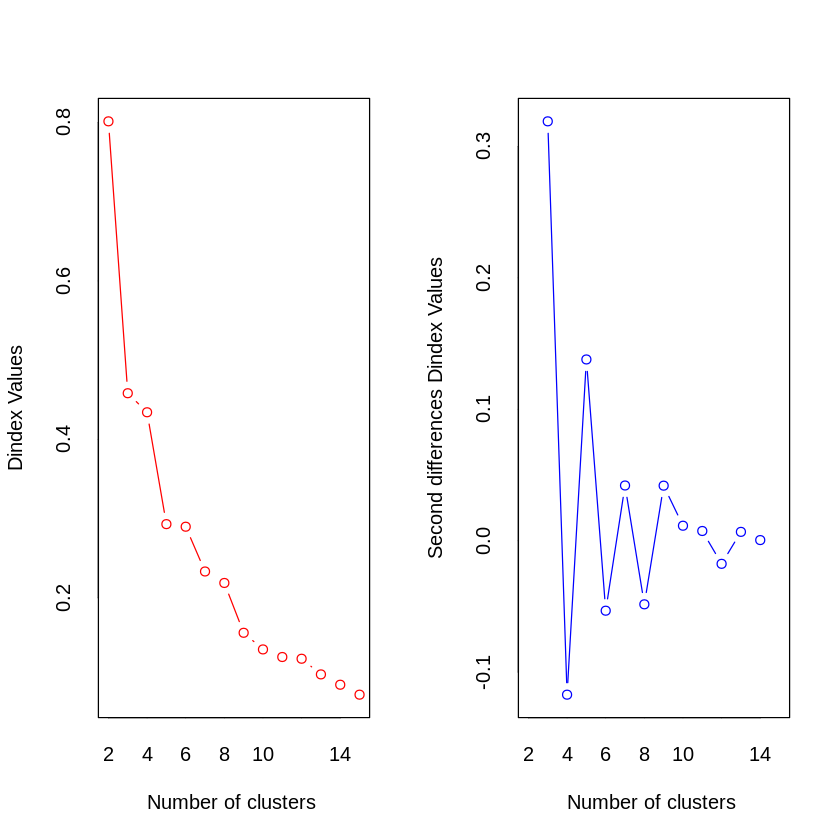

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


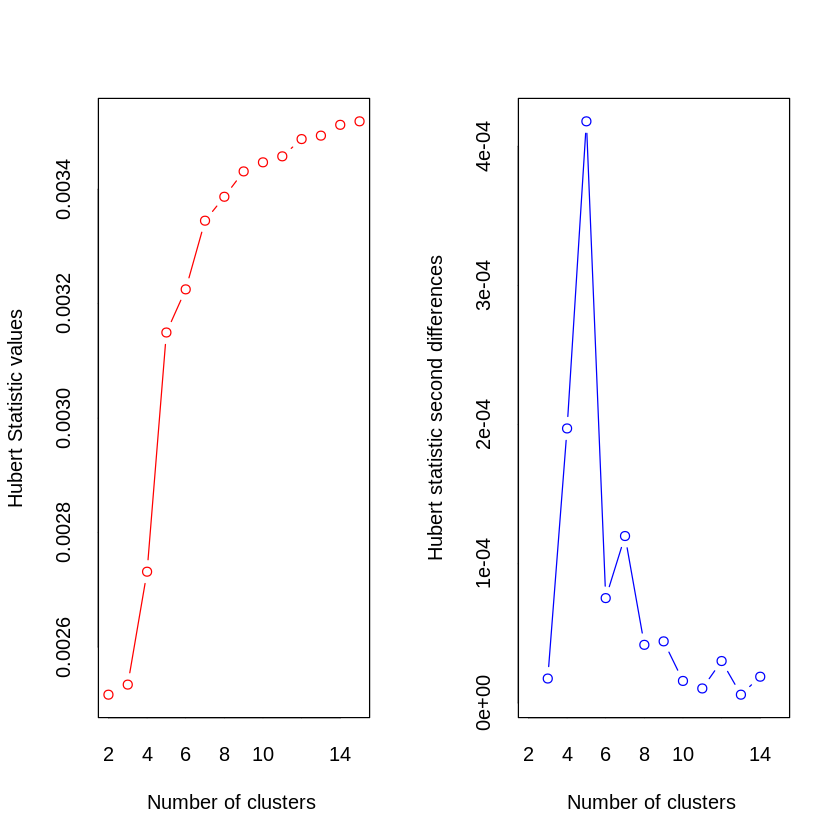

******************************************************************* 
* Among all indices:                                                
* 2 proposed 3 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [527 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [52 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [336 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [191 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [52 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [527 != 1 x 1]”
Warning message in matrix(x[cl == i, ], byrow = FALSE, nrow = 1, ncol = ncol(x)):
“data length differs from size of matrix: [52 != 1 x 1]”
Warning message in matr

[1] "Frey index : No clustering structure in this data set"


Warning message in max(DiffLev[, 5], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


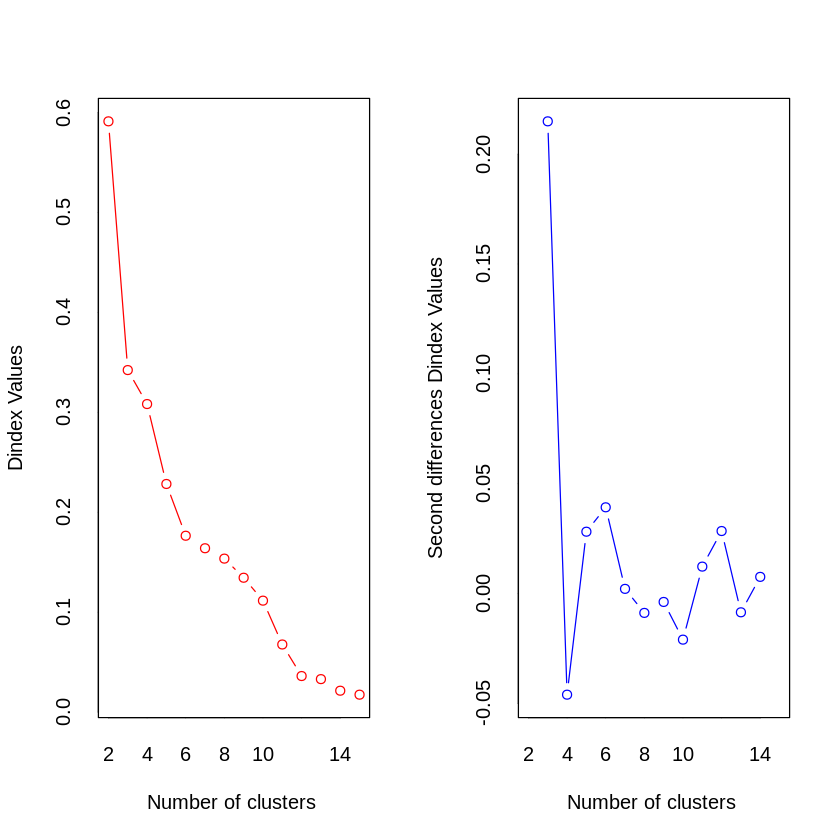

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
“data length [51] is not a sub-multiple or multiple of the number of rows [2]”


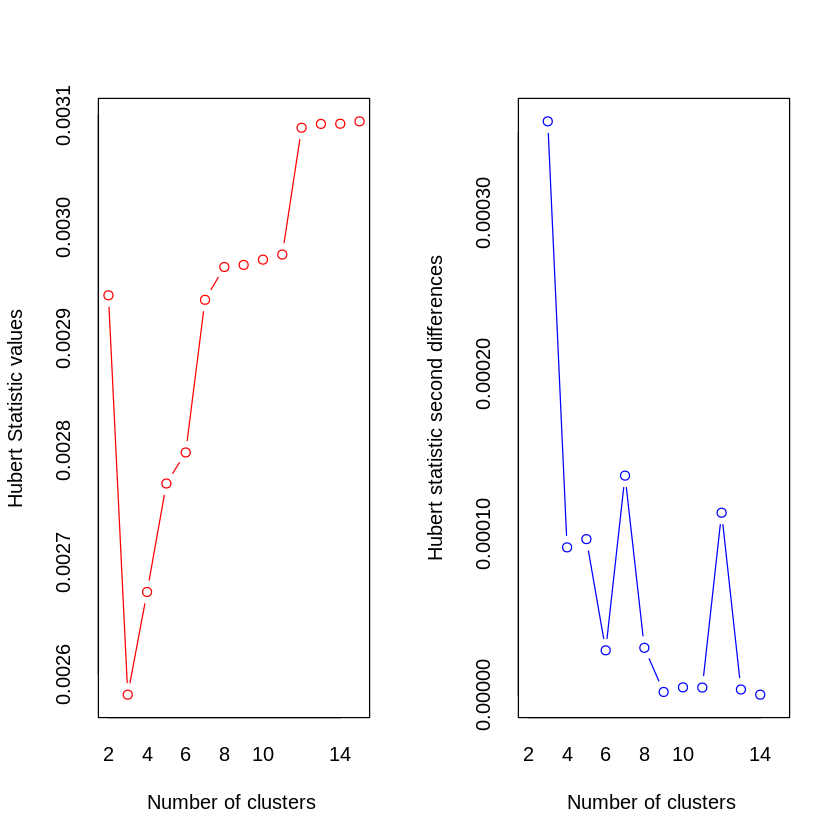

******************************************************************* 
* Among all indices:                                                
* 3 proposed 3 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


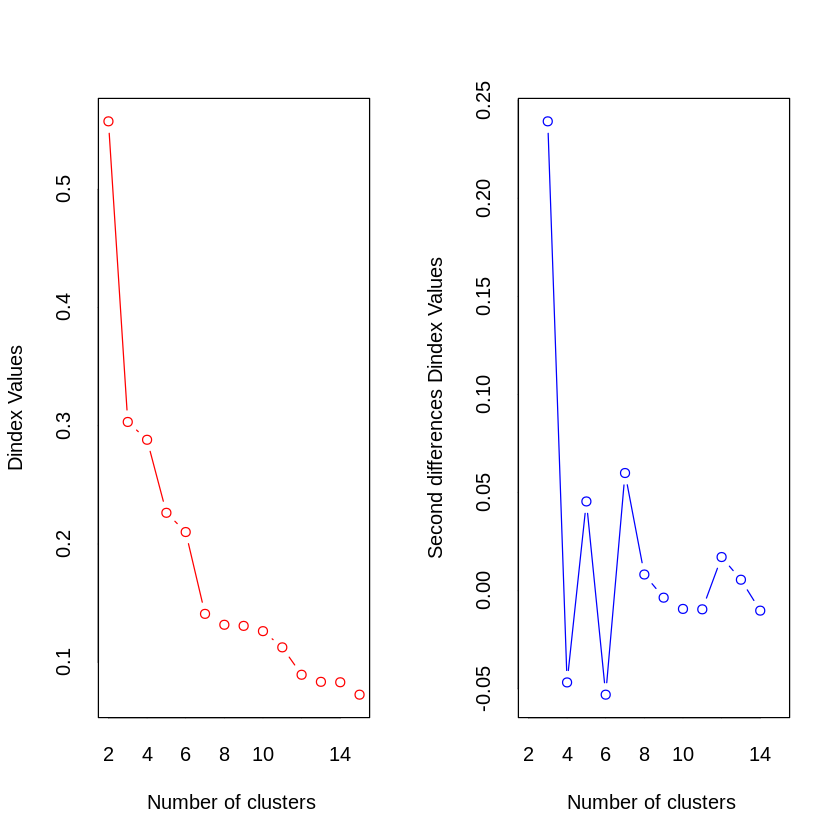

In [13]:
install.packages("NbClust")
library(NbClust)
nc3 <- NbClust(scale(df.cat[, 3]), distance="euclidean", min.nc=2, max.nc=15, method="average") #5
nc4 <- NbClust(scale(df.cat[, 4]), distance="euclidean", min.nc=2, max.nc=15, method="average") #5
nc5 <- NbClust(scale(df.cat[, 5]), distance="euclidean", min.nc=2, max.nc=15, method="average") #8
nc6 <- NbClust(scale(df.cat[, 6]), distance="euclidean", min.nc=2, max.nc=15, method="average") #8
nc7 <- NbClust(scale(df.cat[, 7]), distance="euclidean", min.nc=2, max.nc=15, method="average") #5
nc8 <- NbClust(scale(df.cat[, 8]), distance="euclidean", min.nc=2, max.nc=15, method="average") #4
nc9 <- NbClust(scale(df.cat[, 9]), distance="euclidean", min.nc=2, max.nc=15, method="average") #15
nc10 <- NbClust(scale(df.cat[, 10]), distance="euclidean", min.nc=2, max.nc=15, method="average") #3
nc11 <- NbClust(scale(df.cat[, 11]), distance="euclidean", min.nc=2, max.nc=15, method="average") #3

In [14]:
fit3 <- hclust(d3, method="average")
fit4 <- hclust(d4, method="average")
fit5 <- hclust(d5, method="average")
fit6 <- hclust(d6, method="average")
fit7 <- hclust(d7, method="average")
fit8 <- hclust(d8, method="average")
fit9 <- hclust(d9, method="average")
fit10 <- hclust(d10, method="average")
fit11 <- hclust(d11, method="average")

In [15]:

c3 <- cutree(fit3, k=5)
c4 <- cutree(fit4, k=5)
c5 <- cutree(fit5, k=8)
c6 <- cutree(fit6, k=8)
c7 <- cutree(fit7, k=5)
c8 <- cutree(fit8, k=4)
c9 <- cutree(fit9, k=15)
c10 <- cutree(fit10, k=3)
c11 <- cutree(fit11, k=3)

df.catfinal <- cbind(df.cat, c3, c4, c5, c6, c7, c8, c9, c10, c11)
df.catfinal2 <- subset(df.catfinal, select = c("Age", "Gender", "Total_Bilirubin", "c3", "Direct_Bilirubin", "c4", "Alkaline_Phosphotase", "c5", "Alamine_Aminotransferase", "c6", "Aspartate_Aminotransferase", "c7", "Total_Protiens", "c8", "Albumin", "c9", "Albumin_and_Globulin_Ratio", "c10", "AST_ALT_ratio", "c11","Dataset"))

df.catfinal2 <- df.catfinal2 %>%
  dplyr::rename(Total_Bilirubin_ = c3, Direct_Bilirubin_ = c4, Alkaline_Phosphotase_ = c5, Alamine_Aminotransferase_ = c6, Aspartate_Aminotransferase_ = c7, Total_Protiens_ = c8, Albumin_ = c9, Albumin_and_Globulin_Ratio_ = c10, AST_ALT_ratio_ = c11)

df.cat.f <- subset(df.catfinal2, select = c("Age", "Gender", "Total_Bilirubin_", "Direct_Bilirubin_", "Alkaline_Phosphotase_", "Alamine_Aminotransferase_", "Aspartate_Aminotransferase_", "Total_Protiens_", "Albumin_", "Albumin_and_Globulin_Ratio_", "AST_ALT_ratio_", "Dataset"))

df.cat.f$Total_Bilirubin_ <- as.factor(df.cat.f$Total_Bilirubin_)
df.cat.f$Direct_Bilirubin_ <- as.factor(df.cat.f$Direct_Bilirubin_)
df.cat.f$Alkaline_Phosphotase_ <- as.factor(df.cat.f$Alkaline_Phosphotase_)
df.cat.f$Alamine_Aminotransferase_ <- as.factor(df.cat.f$Alamine_Aminotransferase_)
df.cat.f$Aspartate_Aminotransferase_ <- as.factor(df.cat.f$Aspartate_Aminotransferase_)
df.cat.f$Total_Protiens_ <- as.factor(df.cat.f$Total_Protiens_)
df.cat.f$Albumin_ <- as.factor(df.cat.f$Albumin_)
df.cat.f$Albumin_and_Globulin_Ratio_ <- as.factor(df.cat.f$Albumin_and_Globulin_Ratio_)
df.cat.f$AST_ALT_ratio_ <- as.factor(df.cat.f$AST_ALT_ratio_)

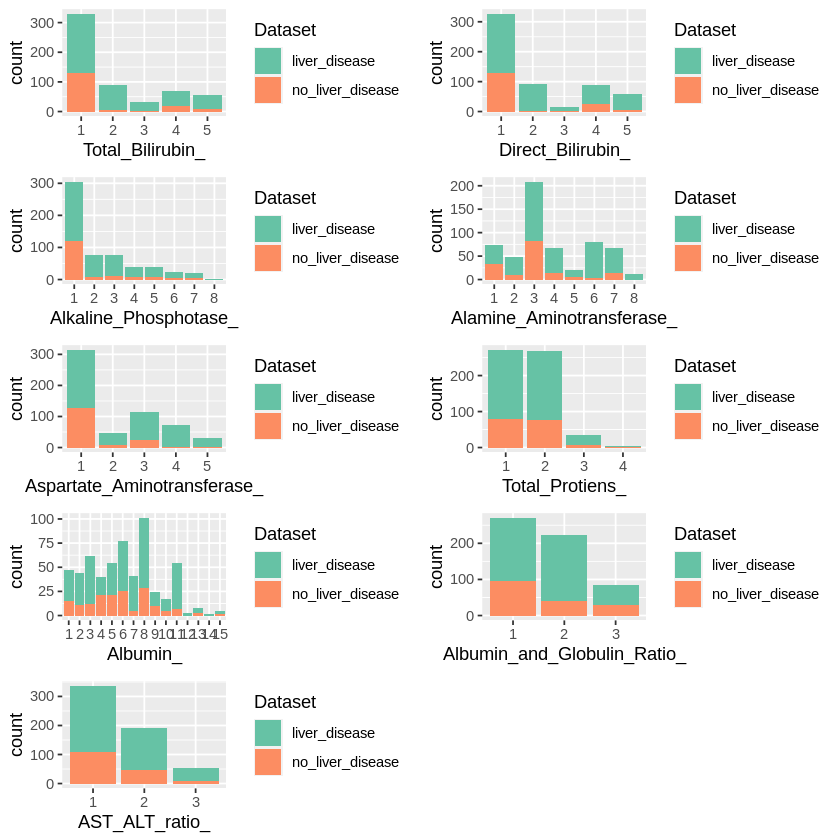

In [16]:
p1 <- ggplot(df.cat.f, aes(x=Total_Bilirubin_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p2 <- ggplot(df.cat.f, aes(x=Direct_Bilirubin_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p3 <- ggplot(df.cat.f, aes(x=Alkaline_Phosphotase_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p4 <- ggplot(df.cat.f, aes(x=Alamine_Aminotransferase_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p5 <- ggplot(df.cat.f, aes(x=Aspartate_Aminotransferase_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p6 <- ggplot(df.cat.f, aes(x=Total_Protiens_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p7 <- ggplot(df.cat.f, aes(x=Albumin_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p8 <- ggplot(df.cat.f, aes(x=Albumin_and_Globulin_Ratio_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

p9 <- ggplot(df.cat.f, aes(x=AST_ALT_ratio_)) +
    geom_bar(aes(fill=Dataset)) +
    scale_fill_brewer(palette = "Set2")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol=2)

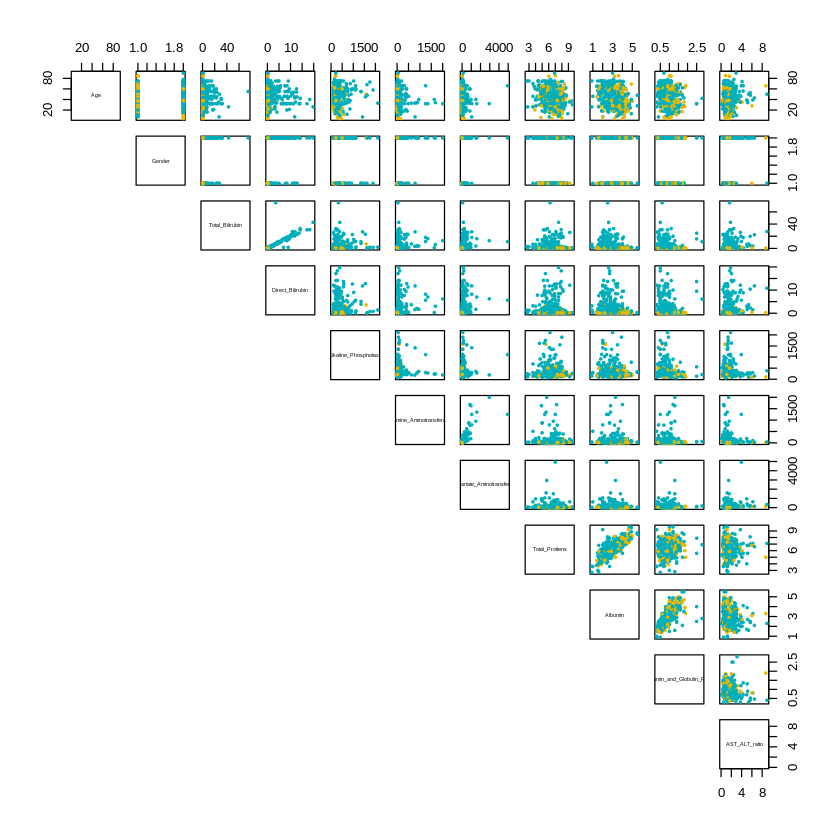

In [21]:
cols <- c("#00AFBB", "#E7B800")
pairs(df.o[,1:11], pch = 19,  cex = 0.4,
      col = cols[df.o$Dataset],
      lower.panel=NULL,
      cex.labels = 0.4)


In [22]:
wilcox.tests.o <- lapply(df.o[,c("Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio", "Age", "AST_ALT_ratio")], function(x) wilcox.test(x ~ df.o$Dataset)$p.value)

#df.o.log
wilcox.tests.o.log <- lapply(df.o.log[,c("Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio", "Age", "AST_ALT_ratio")], function(x) wilcox.test(x ~ df.o.log$Dataset)$p.value)

#df.o.wo
wilcox.tests.o.wo <- lapply(df.o.wo[,c("Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio", "Age", "AST_ALT_ratio")], function(x) wilcox.test(x ~ df.o.wo$Dataset)$p.value)

results_wilcox <- cbind(wilcox.tests.o, wilcox.tests.o.log, wilcox.tests.o.wo)
results_wilcox

wilcox.tests.o wilcox.tests.o.log wilcox.tests.o.wo
Total_Bilirubin            2.748439e-13   2.748439e-13       4.979732e-13     
Direct_Bilirubin           6.449568e-13   6.449568e-13       8.72447e-13      
Alkaline_Phosphotase       9.936943e-11   9.936943e-11       1.205418e-10     
Alamine_Aminotransferase   3.702919e-12   3.702919e-12       4.594092e-12     
Aspartate_Aminotransferase 1.310704e-13   1.310704e-13       1.386802e-13     
Total_Protiens             0.446179       0.446179           0.4468362        
Albumin                    5.931425e-05   5.931425e-05       5.931425e-05     
Albumin_and_Globulin_Ratio 5.812072e-06   5.812072e-06       5.690612e-06     
Age                        0.002731931    0.002731931        0.002731931      
AST_ALT_ratio              0.05342674     0.05342674         0.05320489

In [23]:
chisq.tests <- lapply(df.cat.f[,c("Gender", "Total_Bilirubin_", "Direct_Bilirubin_", "Alkaline_Phosphotase_", "Alamine_Aminotransferase_", "Aspartate_Aminotransferase_", "Total_Protiens_", "Albumin_", "Albumin_and_Globulin_Ratio_", "AST_ALT_ratio_")], function(x) chisq.test(xtabs(~ Dataset + x, df.cat.f))$p.value)
chisq.tests

Warning message in chisq.test(xtabs(~Dataset + x, df.cat.f)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(~Dataset + x, df.cat.f)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(~Dataset + x, df.cat.f)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(~Dataset + x, df.cat.f)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(~Dataset + x, df.cat.f)):
“Chi-squared approximation may be incorrect”


$Gender
[1] 0.06432014

$Total_Bilirubin_
[1] 4.65473e-12

$Direct_Bilirubin_
[1] 1.482585e-12

$Alkaline_Phosphotase_
[1] 2.575551e-07

$Alamine_Aminotransferase_
[1] 2.234549e-09

$Aspartate_Aminotransferase_
[1] 3.965019e-11

$Total_Protiens_
[1] 0.8337877

$Albumin_
[1] 0.001863017

$Albumin_and_Globulin_Ratio_
[1] 3.908695e-05

$AST_ALT_ratio_
[1] 0.05498922

In [24]:
chisq.tests.ind <- chisq.test(xtabs(~ Dataset + Total_Bilirubin_, df.cat.f))
chisq.tests.ind$residuals

                  Total_Bilirubin_
Dataset                     1          2          3          4          5
  liver_disease    -2.4282417  2.5738834  1.7301178  0.1340244  1.1346229
  no_liver_disease  3.8463617 -4.0770597 -2.7405257 -0.2122961 -1.7972552

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘ranger’




Age                     Gender 
                 Confirmed                   Rejected 
           Total_Bilirubin           Direct_Bilirubin 
                 Confirmed                  Confirmed 
      Alkaline_Phosphotase   Alamine_Aminotransferase 
                 Confirmed                  Confirmed 
Aspartate_Aminotransferase             Total_Protiens 
                 Confirmed                   Rejected 
                   Albumin Albumin_and_Globulin_Ratio 
                  Rejected                   Rejected 
             AST_ALT_ratio 
                  Rejected 
Levels: Tentative Confirmed Rejected

Age                     Gender 
                 Confirmed                   Rejected 
           Total_Bilirubin           Direct_Bilirubin 
                 Confirmed                  Confirmed 
      Alkaline_Phosphotase   Alamine_Aminotransferase 
                 Confirmed                  Confirmed 
Aspartate_Aminotransferase             Total_Protiens 
                 Confirmed                   Rejected 
                   Albumin Albumin_and_Globulin_Ratio 
                  Rejected                   Rejected 
             AST_ALT_ratio 
                  Rejected 
Levels: Tentative Confirmed Rejected

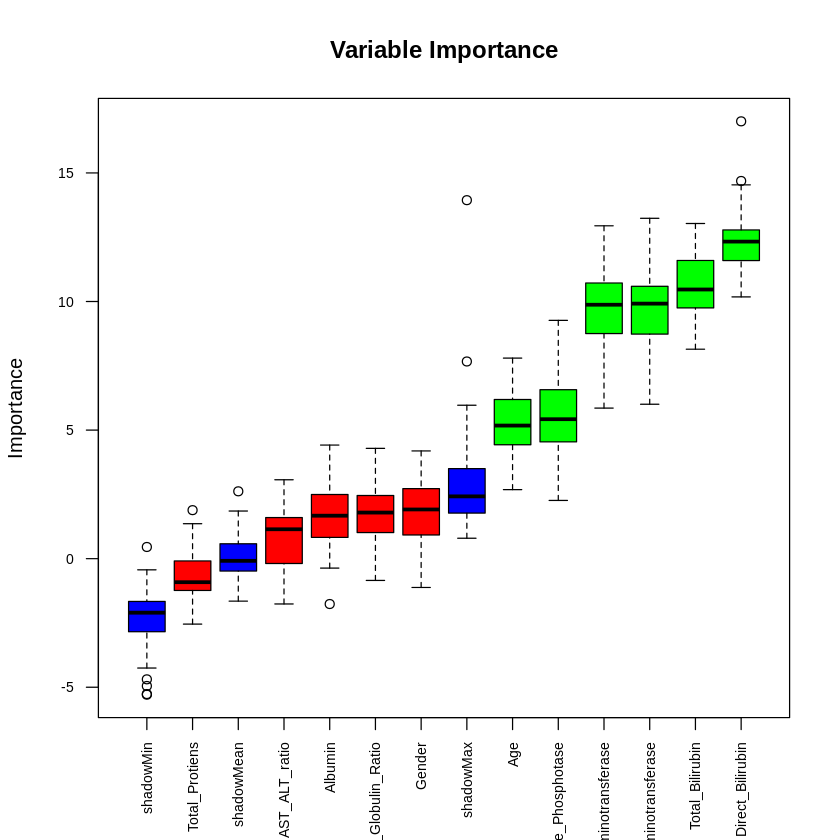

Age                      Gender 
                  Confirmed                    Rejected 
           Total_Bilirubin_           Direct_Bilirubin_ 
                  Confirmed                   Confirmed 
      Alkaline_Phosphotase_   Alamine_Aminotransferase_ 
                  Confirmed                   Confirmed 
Aspartate_Aminotransferase_             Total_Protiens_ 
                  Confirmed                    Rejected 
                   Albumin_ Albumin_and_Globulin_Ratio_ 
                   Rejected                    Rejected 
             AST_ALT_ratio_ 
                   Rejected 
Levels: Tentative Confirmed Rejected

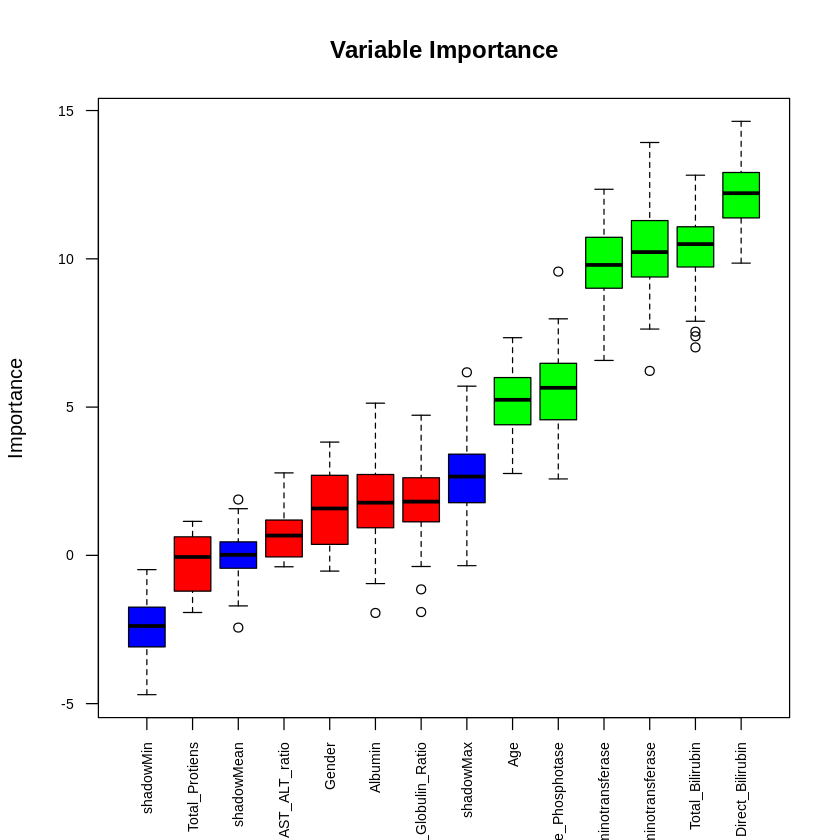

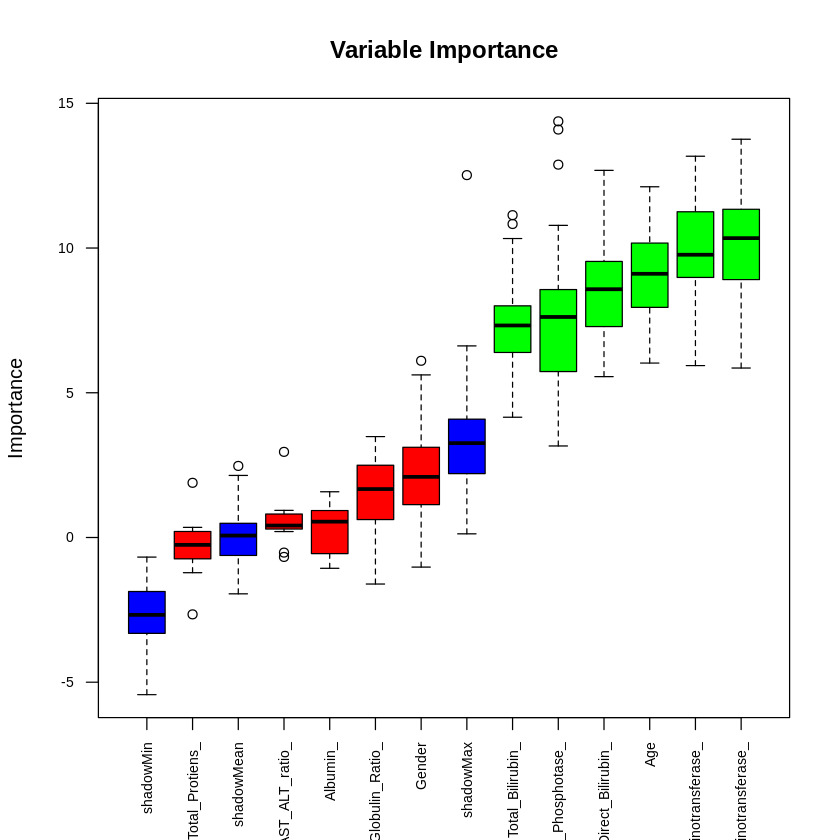

In [28]:
install.packages("Boruta")
library(Boruta)
library(randomForest)
set.seed(123)
boruta_output <- Boruta(Dataset ~ ., data=df.o, doTrace=0)
boruta_output$finalDecision
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")

set.seed(123)
boruta_output <- Boruta(Dataset ~ ., data=df.o.wo, doTrace=0)
boruta_output$finalDecision
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")

set.seed(123)
boruta_output <- Boruta(Dataset ~ ., data=df.cat.f, doTrace=0)
boruta_output$finalDecision
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")

In [29]:
set.seed(123)
fit=randomForest(Dataset~., data=df.o)
varImp(fit)

set.seed(123)
fit=randomForest(Dataset~., data=df.o.wo)
varImp(fit)

set.seed(123)
fit=randomForest(Dataset~., data=df.cat.f)
varImp(fit)

Overall  
Age                        26.535630
Gender                      3.693215
Total_Bilirubin            22.710747
Direct_Bilirubin           17.766657
Alkaline_Phosphotase       32.105306
Alamine_Aminotransferase   27.514931
Aspartate_Aminotransferase 27.301637
Total_Protiens             19.205809
Albumin                    19.112087
Albumin_and_Globulin_Ratio 16.517576
AST_ALT_ratio              23.626064

Overall  
Age                        26.899831
Gender                      3.425688
Total_Bilirubin            21.473734
Direct_Bilirubin           17.213748
Alkaline_Phosphotase       31.666055
Alamine_Aminotransferase   27.242888
Aspartate_Aminotransferase 27.925299
Total_Protiens             18.759686
Albumin                    19.983295
Albumin_and_Globulin_Ratio 16.593362
AST_ALT_ratio              24.228909

Overall  
Age                         45.918128
Gender                       7.190711
Total_Bilirubin_            13.164391
Direct_Bilirubin_           15.883589
Alkaline_Phosphotase_       21.946325
Alamine_Aminotransferase_   27.706936
Aspartate_Aminotransferase_ 14.005067
Total_Protiens_              8.610579
Albumin_                    38.865566
Albumin_and_Globulin_Ratio_  9.843571
AST_ALT_ratio_               8.903401

In [30]:
set.seed(123)
model.lr <- glm(Dataset ~ ., data = df.o, family = binomial(link='logit'))
summary(model.lr)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Dataset ~ ., family = binomial(link = "logit"), 
    data = df.o)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                 3.4080440  1.3364579   2.550  0.01077 * 
Age                        -0.0183287  0.0063879  -2.869  0.00411 **
GenderMale                 -0.0298962  0.2334396  -0.128  0.89810   
Total_Bilirubin            -0.0088230  0.0827364  -0.107  0.91507   
Direct_Bilirubin           -0.4685817  0.2388022  -1.962  0.04974 * 
Alkaline_Phosphotase       -0.0012776  0.0008175  -1.563  0.11811   
Alamine_Aminotransferase   -0.0060124  0.0062308  -0.965  0.33457   
Aspartate_Aminotransferase -0.0076101  0.0050455  -1.508  0.13148   
Total_Protiens             -1.0023827  0.3862528  -2.595  0.00946 **
Albumin                     1.8699162  0.7609616   2.457  0.01400 * 
Albumin_and_Globulin_Ratio -2.0437179  1.1578805  -1.765  0.07756 . 
AST_ALT_ratio               0.2834311  0.2009464   1.410  0.15840   
-

In [31]:
df.o$Dataset <- relevel(df.o$Dataset, "no_liver_disease")
df.o.wo$Dataset <- relevel(df.o.wo$Dataset, "no_liver_disease")
df.cat.f$Dataset <- relevel(df.cat.f$Dataset, "no_liver_disease")

In [32]:
set.seed(123)
training.samples <- df.o$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o[ training.samples,]
df.Test  <- df.o[-training.samples,]


In [33]:
set.seed(123)
model.lr.o <- glm(Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Total_Protiens + Albumin + Age, data = df.Train, family = binomial(link='logit'))
summary(model.lr.o)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Total_Protiens + Albumin + Age, 
    family = binomial(link = "logit"), data = df.Train)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)   
(Intercept)              -1.5301209  0.8769951  -1.745  0.08103 . 
Total_Bilirubin           0.2601250  0.1002763   2.594  0.00948 **
Alkaline_Phosphotase      0.0009163  0.0008615   1.064  0.28752   
Alamine_Aminotransferase  0.0141188  0.0044700   3.159  0.00159 **
Total_Protiens            0.4487603  0.2028569   2.212  0.02695 * 
Albumin                  -0.7214425  0.2883465  -2.502  0.01235 * 
Age                       0.0124358  0.0071520   1.739  0.08207 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 554.14  on 463  degrees of freedom
Residual deviance: 467.20  on 457  degrees of freedom
AIC: 481.2

Number of 

In [34]:
probabilities <- model.lr.o %>% predict(df.Test, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, "liver_disease", "no_liver_disease")
matrix.lr.o <- confusionMatrix(relevel(as.factor(predicted.classes), "no_liver_disease"), df.Test$Dataset)
matrix.lr.o

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                8             3
  liver_disease                  25            79
                                          
               Accuracy : 0.7565          
                 95% CI : (0.6677, 0.8317)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.1773          
                                          
                  Kappa : 0.257           
                                          
 Mcnemar's Test P-Value : 7.229e-05       
                                          
            Sensitivity : 0.24242         
            Specificity : 0.96341         
         Pos Pred Value : 0.72727         
         Neg Pred Value : 0.75962         
             Prevalence : 0.28696         
         Detection Rate : 0.06957         
   Detection Prevalence : 0.09565         
      Balanced Accuracy : 0.60292         
               

In [35]:
set.seed(123)
training.samples <- df.o.wo$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o.wo[ training.samples,]
df.Test  <- df.o.wo[-training.samples,]

In [36]:
set.seed(123)
model.lr.o.wo <- glm(Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Total_Protiens + Albumin + Age, data = df.Train, family = binomial(link='logit'))
summary(model.lr.o.wo)


Call:
glm(formula = Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Total_Protiens + Albumin + Age, 
    family = binomial(link = "logit"), data = df.Train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.962726   0.911032  -2.154  0.03121 *  
Total_Bilirubin           0.371582   0.123149   3.017  0.00255 ** 
Alkaline_Phosphotase      0.002383   0.001468   1.624  0.10445    
Alamine_Aminotransferase  0.017826   0.005253   3.394  0.00069 ***
Total_Protiens            0.425329   0.207456   2.050  0.04034 *  
Albumin                  -0.699251   0.289766  -2.413  0.01581 *  
Age                       0.012225   0.007225   1.692  0.09063 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 554.14  on 463  degrees of freedom
Residual deviance: 469.53  on 457  degrees of freedom
AIC: 483.53

Number of

In [37]:
probabilities <- model.lr.o.wo %>% predict(df.Test, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, "liver_disease", "no_liver_disease")
matrix.lr.o.wo <- confusionMatrix(relevel(as.factor(predicted.classes), "no_liver_disease"), df.Test$Dataset)
matrix.lr.o.wo

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                7             4
  liver_disease                  26            78
                                          
               Accuracy : 0.7391          
                 95% CI : (0.649, 0.8166) 
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.307050        
                                          
                  Kappa : 0.204           
                                          
 Mcnemar's Test P-Value : 0.000126        
                                          
            Sensitivity : 0.21212         
            Specificity : 0.95122         
         Pos Pred Value : 0.63636         
         Neg Pred Value : 0.75000         
             Prevalence : 0.28696         
         Detection Rate : 0.06087         
   Detection Prevalence : 0.09565         
      Balanced Accuracy : 0.58167         
               

In [38]:
set.seed(123)
training.samples <- df.o$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o[ training.samples,]
df.Test  <- df.o[-training.samples,]

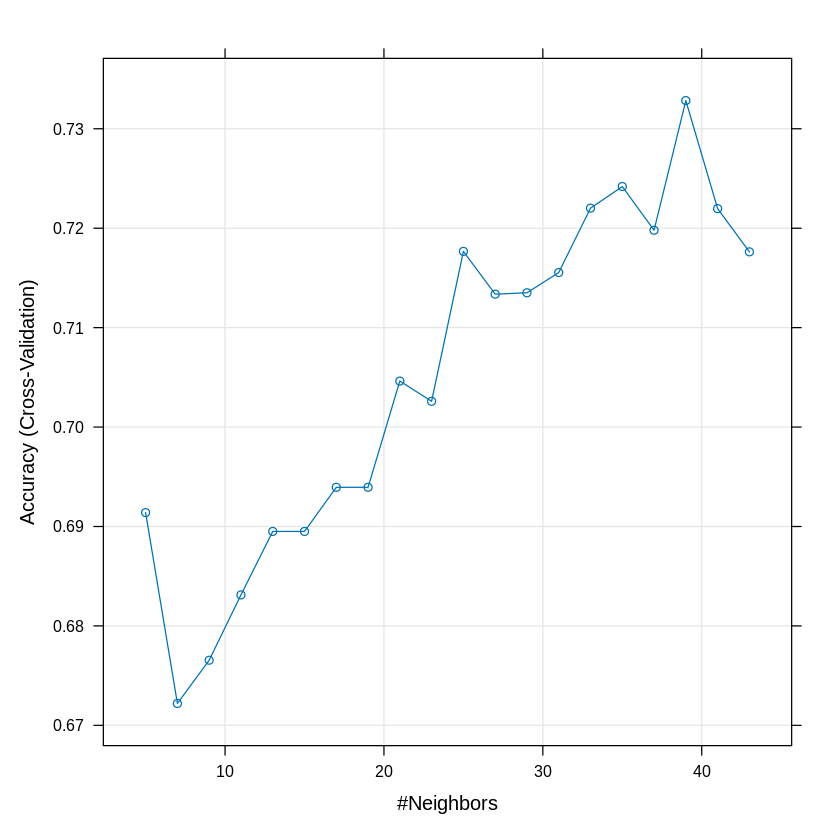

In [39]:
set.seed(123)
model.knn.o <- train(
  Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Total_Protiens + Albumin + Age, data = df.Train, method = "knn",
  trControl = trainControl("cv", number = 10),
  preProcess = c("center","scale"), #no for categoric
  tuneLength = 20
  )
plot(model.knn.o)


In [40]:
predicted.classes <- model.knn.o %>% predict(df.Test)
matrix.knn.o <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.knn.o

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                5             5
  liver_disease                  28            77
                                          
               Accuracy : 0.713           
                 95% CI : (0.6212, 0.7935)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.5467811       
                                          
                  Kappa : 0.1144          
                                          
 Mcnemar's Test P-Value : 0.0001283       
                                          
            Sensitivity : 0.15152         
            Specificity : 0.93902         
         Pos Pred Value : 0.50000         
         Neg Pred Value : 0.73333         
             Prevalence : 0.28696         
         Detection Rate : 0.04348         
   Detection Prevalence : 0.08696         
      Balanced Accuracy : 0.54527         
               

In [42]:
set.seed(123)
training.samples <- df.o.wo$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o.wo[ training.samples,]
df.Test  <- df.o.wo[-training.samples,]


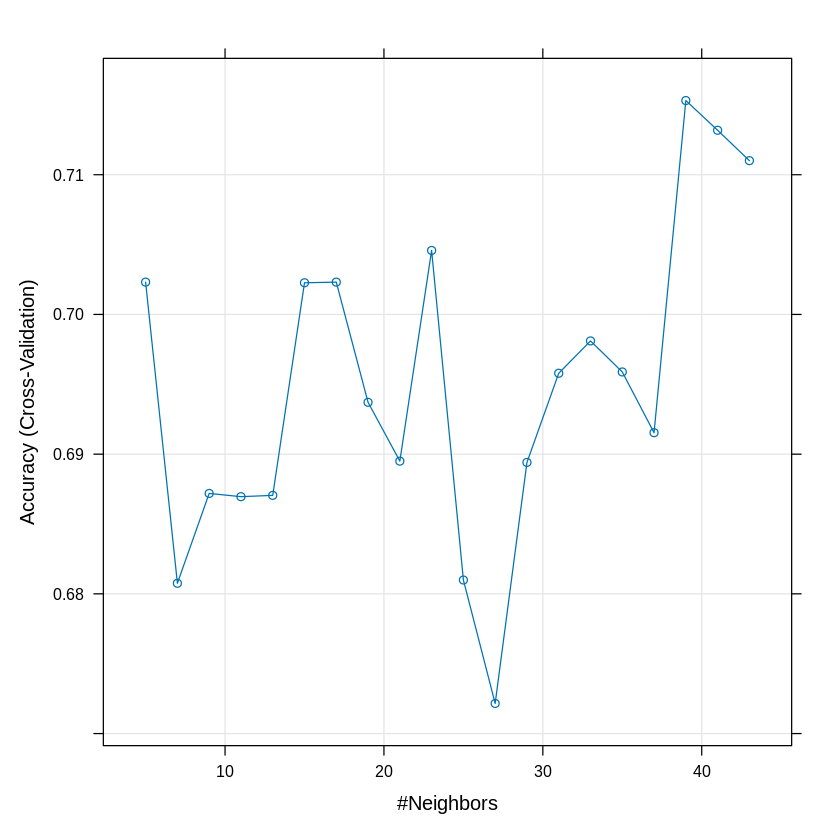

In [43]:
set.seed(123)
model.knn.o.wo <- train(
  Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Total_Protiens + Age, data = df.Train, method = "knn",
  trControl = trainControl("cv", number = 10),
  preProcess = c("center","scale"), #no for categoric
  tuneLength = 20
  )
plot(model.knn.o.wo)

In [44]:
# Prediction
predicted.classes <- model.knn.o.wo %>% predict(df.Test)
matrix.knn.o.wo <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.knn.o.wo

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                5            12
  liver_disease                  28            70
                                          
               Accuracy : 0.6522          
                 95% CI : (0.5577, 0.7386)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.93683         
                                          
                  Kappa : 0.0061          
                                          
 Mcnemar's Test P-Value : 0.01771         
                                          
            Sensitivity : 0.15152         
            Specificity : 0.85366         
         Pos Pred Value : 0.29412         
         Neg Pred Value : 0.71429         
             Prevalence : 0.28696         
         Detection Rate : 0.04348         
   Detection Prevalence : 0.14783         
      Balanced Accuracy : 0.50259         
               

In [45]:
set.seed(123)
training.samples <- df.cat.f$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.cat.f[ training.samples,]
df.Test  <- df.cat.f[-training.samples,]

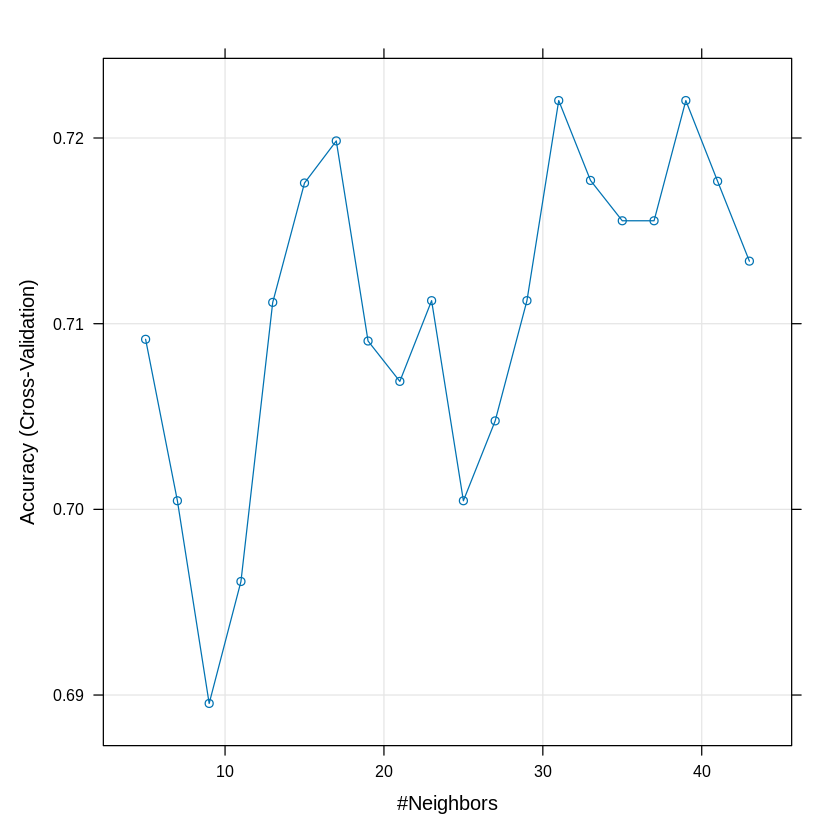

In [46]:
set.seed(123)
model.knn.cat.f <- train(
  Dataset ~ Direct_Bilirubin_ + Alkaline_Phosphotase_ + Alamine_Aminotransferase_ + Albumin_ + AST_ALT_ratio_ + Age, data = df.Train, method = "knn",
  trControl = trainControl("cv", number = 10),
  tuneLength = 20
  )
plot(model.knn.cat.f)

In [47]:
# Prediction
predicted.classes <- model.knn.cat.f %>% predict(df.Test)
matrix.knn.cat.f <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.knn.cat.f

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                1             3
  liver_disease                  32            79
                                          
               Accuracy : 0.6957          
                 95% CI : (0.6029, 0.778) 
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.7005          
                                          
                  Kappa : -0.0085         
                                          
 Mcnemar's Test P-Value : 2.214e-06       
                                          
            Sensitivity : 0.030303        
            Specificity : 0.963415        
         Pos Pred Value : 0.250000        
         Neg Pred Value : 0.711712        
             Prevalence : 0.286957        
         Detection Rate : 0.008696        
   Detection Prevalence : 0.034783        
      Balanced Accuracy : 0.496859        
               

In [52]:
install.packages("rpart.plot")
library(rpart)
set.seed(123)
training.samples <- df.o$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o[ training.samples,]
df.Test  <- df.o[-training.samples,]

# Model
set.seed(123)
model.tree.o <- rpart(
  Dataset ~ Direct_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Age, data = df.Train, method = "class"
  )
#rpart.plot(model.tree.o, cex = NULL, tweak = 1, extra=108)
printcp(model.tree.o)

# Prediction
predicted.classes <- model.tree.o %>% predict(df.Test, type = "class")
matrix.tree.o <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.tree.o

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Classification tree:
rpart(formula = Dataset ~ Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Age, data = df.Train, method = "class")

Variables actually used in tree construction:
[1] Age                      Alamine_Aminotransferase Alkaline_Phosphotase    
[4] Direct_Bilirubin        

Root node error: 132/464 = 0.28448

n= 464 

        CP nsplit rel error xerror     xstd
1 0.024621      0   1.00000 1.0000 0.073625
2 0.018939     10   0.75000 1.1061 0.075780
3 0.015152     12   0.71212 1.1061 0.075780
4 0.010000     14   0.68182 1.0682 0.075055


Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease               13            16
  liver_disease                  20            66
                                          
               Accuracy : 0.687           
                 95% CI : (0.5938, 0.7702)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.7668          
                                          
                  Kappa : 0.2063          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.3939          
            Specificity : 0.8049          
         Pos Pred Value : 0.4483          
         Neg Pred Value : 0.7674          
             Prevalence : 0.2870          
         Detection Rate : 0.1130          
   Detection Prevalence : 0.2522          
      Balanced Accuracy : 0.5994          
               

In [54]:
# df.o.wo
set.seed(123)
training.samples <- df.o.wo$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o.wo[ training.samples,]
df.Test  <- df.o.wo[-training.samples,]

# Model
set.seed(123)
model.tree.o.wo <- rpart(
  Dataset ~ Direct_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Age, data = df.Train, method = "class"
  )
printcp(model.tree.o.wo)

# Prediction
predicted.classes <- model.tree.o.wo %>% predict(df.Test, type = "class")
matrix.tree.o.wo <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.tree.o.wo


Classification tree:
rpart(formula = Dataset ~ Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Age, data = df.Train, method = "class")

Variables actually used in tree construction:
[1] Age                      Alamine_Aminotransferase Alkaline_Phosphotase    
[4] Direct_Bilirubin        

Root node error: 132/464 = 0.28448

n= 464 

        CP nsplit rel error xerror     xstd
1 0.024621      0   1.00000 1.0000 0.073625
2 0.018939     10   0.75000 1.1061 0.075780
3 0.015152     12   0.71212 1.1061 0.075780
4 0.010000     14   0.68182 1.0682 0.075055


Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease               13            16
  liver_disease                  20            66
                                          
               Accuracy : 0.687           
                 95% CI : (0.5938, 0.7702)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.7668          
                                          
                  Kappa : 0.2063          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.3939          
            Specificity : 0.8049          
         Pos Pred Value : 0.4483          
         Neg Pred Value : 0.7674          
             Prevalence : 0.2870          
         Detection Rate : 0.1130          
   Detection Prevalence : 0.2522          
      Balanced Accuracy : 0.5994          
               


Classification tree:
rpart(formula = Dataset ~ Alkaline_Phosphotase_ + Alamine_Aminotransferase_ + 
    Albumin_ + Age, data = df.Train, method = "class")

Variables actually used in tree construction:
[1] Age                       Alamine_Aminotransferase_
[3] Albumin_                  Alkaline_Phosphotase_    

Root node error: 132/464 = 0.28448

n= 464 

        CP nsplit rel error xerror     xstd
1 0.027778      0   1.00000 1.0000 0.073625
2 0.026515      5   0.83333 1.0682 0.075055
3 0.018939      7   0.78030 1.0909 0.075496
4 0.015152      9   0.74242 1.1136 0.075920
5 0.012626     10   0.72727 1.1288 0.076193
6 0.011364     14   0.66667 1.1742 0.076968
7 0.010000     16   0.64394 1.1742 0.076968


Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease               13            21
  liver_disease                  20            61
                                          
               Accuracy : 0.6435          
                 95% CI : (0.5488, 0.7306)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.9579          
                                          
                  Kappa : 0.1366          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.3939          
            Specificity : 0.7439          
         Pos Pred Value : 0.3824          
         Neg Pred Value : 0.7531          
             Prevalence : 0.2870          
         Detection Rate : 0.1130          
   Detection Prevalence : 0.2957          
      Balanced Accuracy : 0.5689          
               


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = FALSE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 31.25%
Confusion matrix:
                 no_liver_disease liver_disease class.error
no_liver_disease               44            88   0.6666667
liver_disease                  57           275   0.1716867

rf variable importance

                           Overall
Alkaline_Phosphotase       100.000
Age                         56.839
Alamine_Aminotransferase    49.489
Aspartate_Aminotransferase  46.045
Total_Bilirubin             36.432
Albumin                     17.744
Albumin_and_Globulin_Ratio   6.483
Direct_Bilirubin             0.000

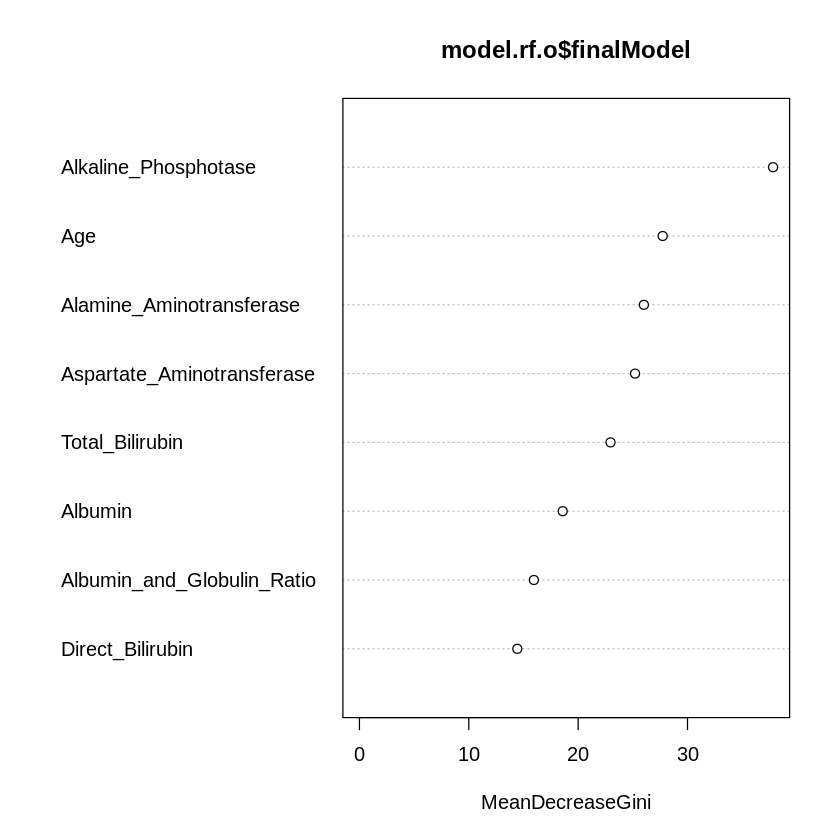

In [57]:
set.seed(123)
training.samples <- df.cat.f$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.cat.f[ training.samples,]
df.Test  <- df.cat.f[-training.samples,]

# Model
set.seed(123)
model.tree.cat.f <- rpart(
  Dataset ~ Alkaline_Phosphotase_ + Alamine_Aminotransferase_ + Albumin_ + Age, data = df.Train, method = "class"
  )
printcp(model.tree.cat.f)
# Prediction
predicted.classes <- model.tree.cat.f %>% predict(df.Test, type = "class")
matrix.tree.cat.f <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.tree.cat.f

#### 4. Random Forest:

# df.o
set.seed(123)
training.samples <- df.o$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o[ training.samples,]
df.Test  <- df.o[-training.samples,]

# Model
set.seed(123)
model.rf.o <- train(
  Dataset ~ Direct_Bilirubin + Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Albumin + Age + Aspartate_Aminotransferase + Albumin_and_Globulin_Ratio, data = df.Train, method = "rf",
  trControl = trainControl("cv", number = 10),
  importance = FALSE
  )
model.rf.o$finalModel

# Plot MeanDecreaseGini
varImpPlot(model.rf.o$finalModel, type = 2)
varImp(model.rf.o)

In [58]:
# Prediction
predicted.classes <- model.rf.o %>% predict(df.Test)
matrix.rf.o <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.rf.o

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease               14            11
  liver_disease                  19            71
                                          
               Accuracy : 0.7391          
                 95% CI : (0.649, 0.8166) 
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.3071          
                                          
                  Kappa : 0.3127          
                                          
 Mcnemar's Test P-Value : 0.2012          
                                          
            Sensitivity : 0.4242          
            Specificity : 0.8659          
         Pos Pred Value : 0.5600          
         Neg Pred Value : 0.7889          
             Prevalence : 0.2870          
         Detection Rate : 0.1217          
   Detection Prevalence : 0.2174          
      Balanced Accuracy : 0.6450          
               


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = FALSE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 31.25%
Confusion matrix:
                 no_liver_disease liver_disease class.error
no_liver_disease               42            90   0.6818182
liver_disease                  55           277   0.1656627

rf variable importance

                           Overall
Alkaline_Phosphotase        100.00
Age                          70.83
Total_Bilirubin              62.27
Aspartate_Aminotransferase   60.32
Alamine_Aminotransferase     56.29
Albumin                      17.59
Albumin_and_Globulin_Ratio    0.00

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease               12            10
  liver_disease                  21            72
                                          
               Accuracy : 0.7304          
                 95% CI : (0.6397, 0.8089)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.38375         
                                          
                  Kappa : 0.2684          
                                          
 Mcnemar's Test P-Value : 0.07249         
                                          
            Sensitivity : 0.3636          
            Specificity : 0.8780          
         Pos Pred Value : 0.5455          
         Neg Pred Value : 0.7742          
             Prevalence : 0.2870          
         Detection Rate : 0.1043          
   Detection Prevalence : 0.1913          
      Balanced Accuracy : 0.6208          
               

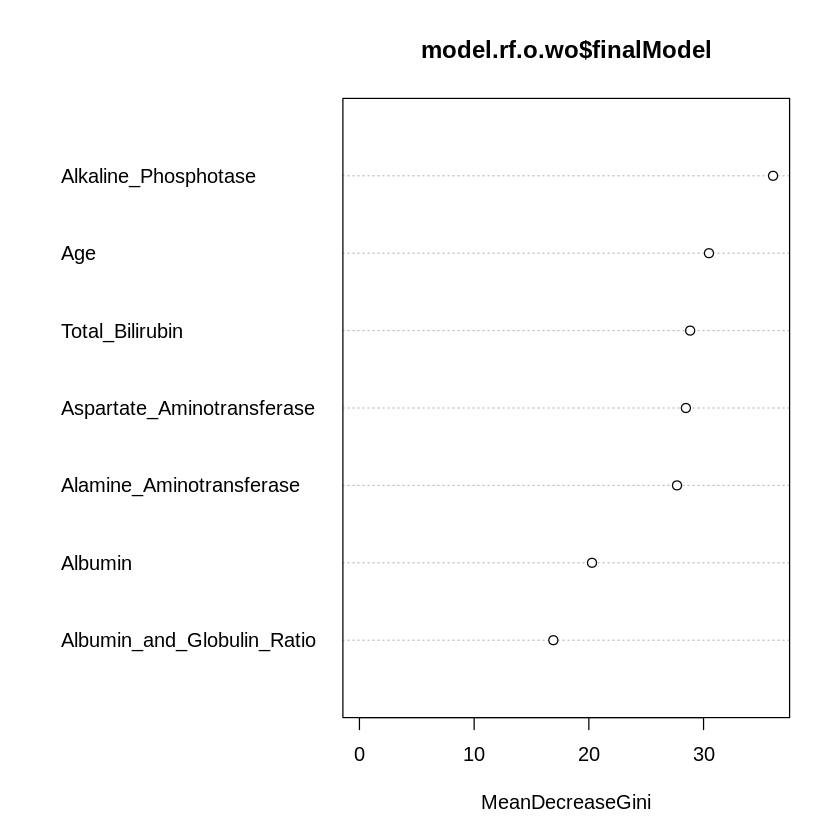

In [59]:
# df.o.wo
set.seed(123)
training.samples <- df.o.wo$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.o.wo[ training.samples,]
df.Test  <- df.o.wo[-training.samples,]

# Model
set.seed(123)
model.rf.o.wo <- train(
  Dataset ~ Total_Bilirubin + Alkaline_Phosphotase + Alamine_Aminotransferase + Albumin + Aspartate_Aminotransferase + Albumin_and_Globulin_Ratio + Age, data = df.Train, method = "rf",
  trControl = trainControl("cv", number = 10),
  importance = FALSE
  )
model.rf.o.wo$finalModel

# Variable Importance
varImp(model.rf.o.wo)
# Plot MeanDecreaseGini
varImpPlot(model.rf.o.wo$finalModel, type = 2)

# Prediction
predicted.classes <- model.rf.o.wo %>% predict(df.Test)
matrix.rf.o.wo <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.rf.o.wo


Age Gender Total_Bilirubin_ Direct_Bilirubin_ Alkaline_Phosphotase_
1   65  Female 1                1                 1                    
2   62  Male   2                2                 2                    
3   62  Male   2                2                 2                    
4   58  Male   1                1                 1                    
5   72  Male   3                3                 1                    
6   46  Male   4                4                 1                    
7   26  Female 1                1                 1                    
8   29  Female 1                1                 1                    
9   17  Male   1                1                 1                    
10  55  Male   1                1                 3                    
11  57  Male   1                1                 1                    
12  72  Male   5                5                 3                    
13  64  Male   1                1                 4                    
14  74  Female 1                1                 1                    
15  61  Male   1                1                 1                    
16  25  Male   1                1                 1                    
17  38  Male   4                4                 4                    
18  33  Male   4                4                 1                    
19  40  Female 1                1                 3                    
20  40  Female 1                1                 3                    
21  51  Male   5                4                 2                    
22  51  Male   5                5                 2                    
23  62  Male   2                2                 2                    
24  40  Male   4                4                 5                    
25  63  Male   1                1                 1                    
26  34  Male   3                3                 3                    
27  34  Male   3                3                 3                    
28  34  Male   2                2                 5                    
29  20  Male   1                4                 6                    
30  84  Female 1                1                 1                    
⋮   ⋮   ⋮      ⋮                ⋮                 ⋮                    
550 46  Male   2                2                 5                    
551 73  Male   4                4                 1                    
552 55  Male   1                1                 3                    
553 51  Male   1                1                 1                    
554 51  Male   5                5                 1                    
555 51  Male   3                2                 3                    
556 26  Male   2                2                 7                    
557 66  Male   2                2                 4                    
558 66  Male   2                2                 4                    
559 66  Male   2                2                 7                    
560 64  Male   4                4                 3                    
561 38  Female 1                1                 1                    
562 43  Male   2                2                 1                    
563 50  Female 1                1                 1                    
564 52  Male   5                5                 5                    
565 20  Female 2                2                 1                    
566 16  Male   2                2                 3                    
567 16  Male   5                5                 5                    
568 90  Male   1                1                 1                    
569 32  Male   2                2                 1                    
570 32  Male   3                5                 2                    
571 32  Male   2                2                 2                    
572 32  Male   2                2                 2                    
573 32  Male   2                2           


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = FALSE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.8%
Confusion matrix:
                 no_liver_disease liver_disease class.error
no_liver_disease                3           129   0.9772727
liver_disease                   0           332   0.0000000

rf variable importance

  only 20 most important variables shown (out of 33)

                           Overall
Age                        100.000
Direct_Bilirubin_2          49.189
Alamine_Aminotransferase_6  41.203
Alamine_Aminotransferase_3  34.477
Direct_Bilirubin_5          29.102
Alkaline_Phosphotase_3      26.271
Alkaline_Phosphotase_2      26.001
Albumin_11                  18.726
Albumin_4                   17.477
Albumin_5                   14.143
Albumin_6                   13.443
Albumin_9                   12.106
Direct_Bilirubin_4          11.642
Alamine_Aminotransferase_4  10.594
Alkaline_Phosphotase_5      10.323
Alamine_Aminotransferase_7   9.949
Alkaline_Phosphotase_4       9.854
Alamine_Aminotransferase_2   9.138
Albumin_3                    7.731
Albumin_8                    7.448

Confusion Matrix and Statistics

                  Reference
Prediction         no_liver_disease liver_disease
  no_liver_disease                1             0
  liver_disease                  32            82
                                          
               Accuracy : 0.7217          
                 95% CI : (0.6305, 0.8013)
    No Information Rate : 0.713           
    P-Value [Acc > NIR] : 0.4648          
                                          
                  Kappa : 0.0427          
                                          
 Mcnemar's Test P-Value : 4.251e-08       
                                          
            Sensitivity : 0.030303        
            Specificity : 1.000000        
         Pos Pred Value : 1.000000        
         Neg Pred Value : 0.719298        
             Prevalence : 0.286957        
         Detection Rate : 0.008696        
   Detection Prevalence : 0.008696        
      Balanced Accuracy : 0.515152        
               

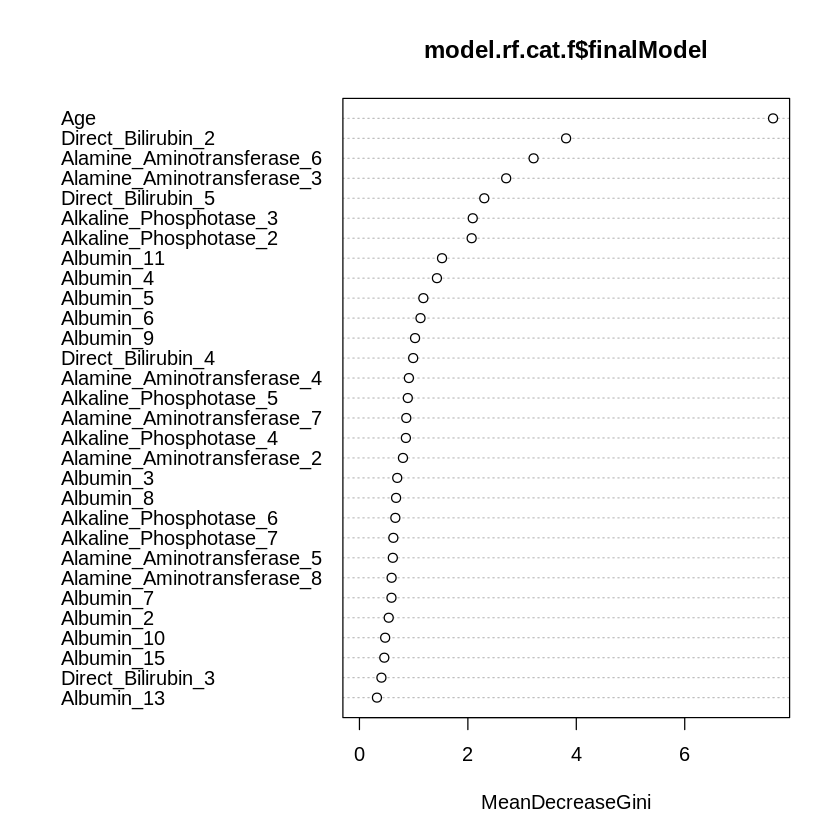

In [60]:
 df.cat.f
set.seed(123)
training.samples <- df.cat.f$Dataset %>%
    createDataPartition(p = 0.8, list = FALSE)
df.Train <- df.cat.f[ training.samples,]
df.Test  <- df.cat.f[-training.samples,]

# Model
set.seed(123)
model.rf.cat.f <- train(
  Dataset ~ Direct_Bilirubin_ + Alkaline_Phosphotase_ + Alamine_Aminotransferase_ + Age + Albumin_, data = df.Train, method = "rf",
  trControl = trainControl("cv", number = 10),
  importance = FALSE
  )
model.rf.cat.f$finalModel

# Variable Importance
varImp(model.rf.cat.f)
# Plot MeanDecreaseGini
varImpPlot(model.rf.cat.f$finalModel, type = 2)


# Prediction
predicted.classes <- model.rf.cat.f %>% predict(df.Test)
matrix.rf.cat.f <- confusionMatrix(predicted.classes, df.Test$Dataset)
matrix.rf.cat.f

In [62]:
x <- data.frame("MLA" = c("Log. Regression", "Log. Regression", "Log. Regression", "KNN", "KNN", "KNN", "CART", "CART", "CART", "Random Forest", "Random Forest", "Random Forest"),
                "Dataframe" = c("ORIGINAL", "ORIGINAL VALUES FITTED", "ORIGINAL CATEGORIZATED", "ORIGINAL", "ORIGINAL VALUES FITTED", "ORIGINAL CATEGORIZATED", "ORIGINAL", "ORIGINAL VALUES FITTED", "ORIGINAL CATEGORIZATED", "ORIGINAL", "ORIGINAL VALUES FITTED", "ORIGINAL CATEGORIZATED"),
                "Accuracy" = c(0.7565, 0.7391, 0.7739, 0.713, 0.6522, 0.6957, 0.687, 0.6435, 0.6435, 0.7391, 0.7304, 0.7217),
                "Number of Predictors" = c("6 of 11", "6 of 11", "7 of 11", "6 of 11", "5 of 11", "6 of 11", "4 of 11", "4 of 11", "4 of 11", "8 of 11", "7 of 11", "5 of 11"))
x

MLA             Dataframe              Accuracy Number.of.Predictors
1  Log. Regression ORIGINAL               0.7565   6 of 11             
2  Log. Regression ORIGINAL VALUES FITTED 0.7391   6 of 11             
3  Log. Regression ORIGINAL CATEGORIZATED 0.7739   7 of 11             
4  KNN             ORIGINAL               0.7130   6 of 11             
5  KNN             ORIGINAL VALUES FITTED 0.6522   5 of 11             
6  KNN             ORIGINAL CATEGORIZATED 0.6957   6 of 11             
7  CART            ORIGINAL               0.6870   4 of 11             
8  CART            ORIGINAL VALUES FITTED 0.6435   4 of 11             
9  CART            ORIGINAL CATEGORIZATED 0.6435   4 of 11             
10 Random Forest   ORIGINAL               0.7391   8 of 11             
11 Random Forest   ORIGINAL VALUES FITTED 0.7304   7 of 11             
12 Random Forest   ORIGINAL CATEGORIZATED 0.7217   5 of 11